# Load and prepare

In [5]:
# source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R")
# source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R")
source("utils.R")

## Get color palette and test for color blindness

In [6]:
library(colorBlindness)

In [7]:
names(PairedColor12Steps) <- NULL

In [8]:
my_col_method <- PairedColor12Steps[c(1,5,7,8,9,10,11,12)]

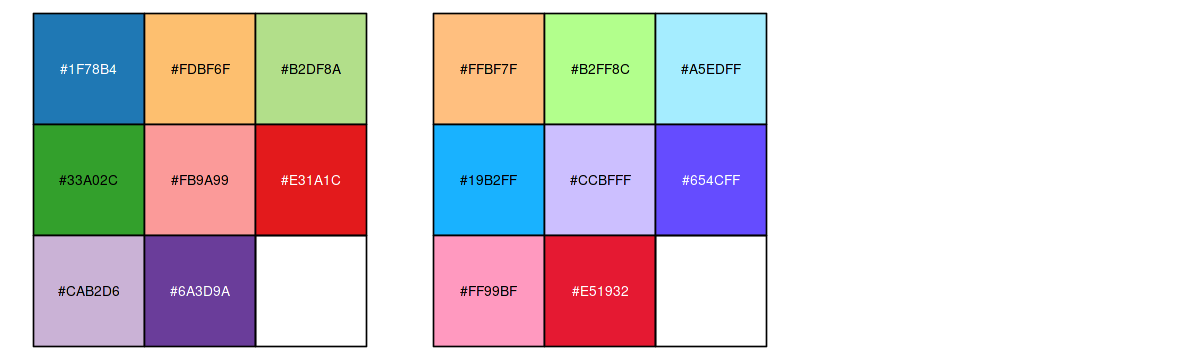

In [5]:
options(repr.plot.width=10, repr.plot.height=3)
par(mfrow=c(1,3))

show_col(my_col_m3)
show_col(my_col_method)

In [6]:
rgb(228,26,28, maxColorValue=255)
rgb(179,222,105, maxColorValue=255)
rgb(246,34,46, maxColorValue=255)
rgb(22,255,50, maxColorValue=255)

[1] "#E41A1C"

[1] "#B3DE69"

[1] "#F6222E"

[1] "#16FF32"

In [7]:
rgb(51,160,44, maxColorValue=255)
rgb(178,223,138, maxColorValue=255)
rgb(227,26,28, maxColorValue=255)
rgb(251,154,153, maxColorValue=255)

[1] "#33A02C"

[1] "#B2DF8A"

[1] "#E31A1C"

[1] "#FB9A99"

Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead.
ℹ The deprecated feature was likely used in the colorBlindness package.
  Please report the issue to the authors.”


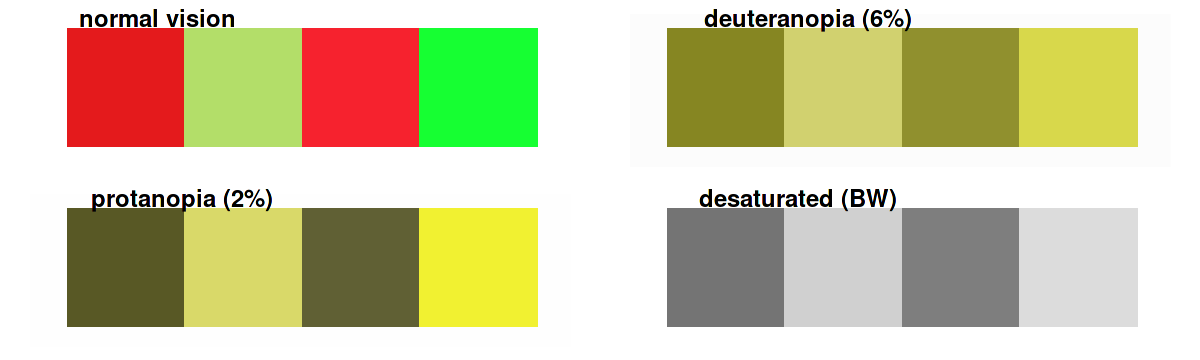

In [8]:
cvdPlot(displayColors(c(rgb(228,26,28, maxColorValue=255), rgb(179,222,105, maxColorValue=255), rgb(246,34,46, maxColorValue=255), rgb(22,255,50, maxColorValue=255))))

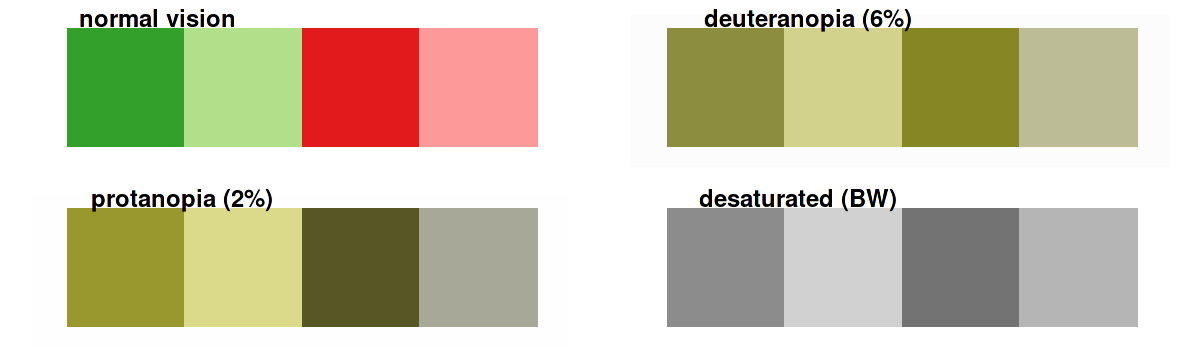

In [9]:
cvdPlot(displayColors(c(rgb(51,160,44, maxColorValue=255),
rgb(178,223,138, maxColorValue=255),
rgb(227,26,28, maxColorValue=255),
rgb(251,154,153, maxColorValue=255))))

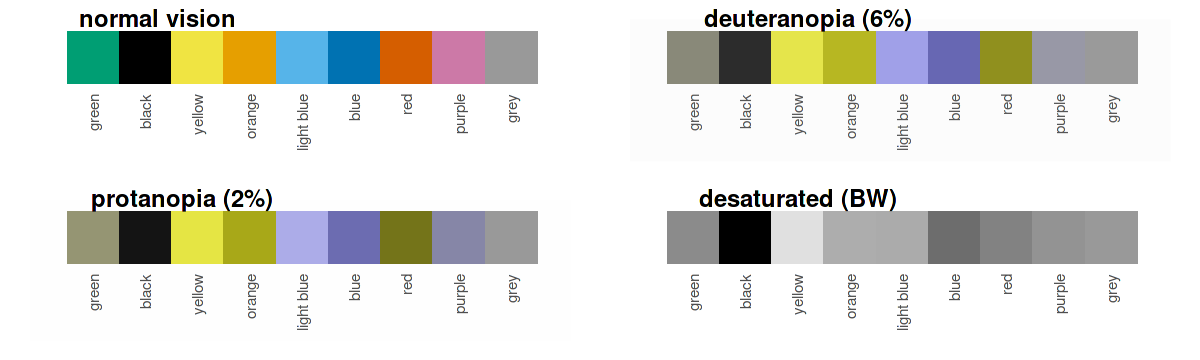

In [10]:
cvdPlot(displayColors(okabeito_colors))

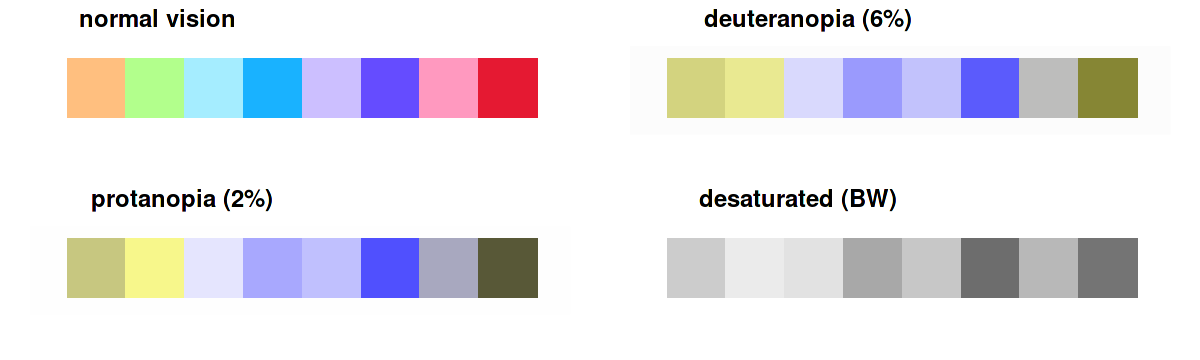

In [11]:
cvdPlot(displayColors(my_col_method))

In [12]:
dataset_ls <- c("Cell_line_mixing", "candidate1",  "candidate2", "Buenrostro_2018",  "Chen_2019",  "PBMC_multiomics") 
dataset_name <- c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC")
k_ls <- c(10, 13, 10, 9, 13, 15)

In [1]:
file1 <- "../result_files/results_meta_data.tsv"
file2 <- "../result_files/results_all_metrics.tsv"
df <- read.table(file1, sep='\t', header=TRUE)
df_metrics <- read.table(file2, sep='\t', header=TRUE)
df_metrics$dataset <- factor(df_metrics$dataset, levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))
df_metrics$long_method <- factor(df_metrics$long_method, levels=c("aggregation", "SnapATAC", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))


## Graph connectivity / PWC

In [14]:
df_g <- read.table("../result_files/graph_metric_all_ndim15.tsv", sep='\t', header=TRUE)
df_gs <- df_g %>% group_by(dataset, method) %>% mutate(average = mean(weak_frac)) %>% subset(select=c(method, dataset, average))
df_gs <- df_gs[!duplicated(df_gs), ]

mapping <- list("Cell line mixing experiment" = "Cell line", 
                     "human adult atlas subset1" = "Atlas1", 
                     "human adult atlas subset2" = "Atlas2",
                     "Buenrostro2018" = "Buenrostro2018",
                     "Chen2019" = "Chen2019",
                     "10X PBMC multiomics" = "10XPBMC")
df_gs <- df_gs %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[[as.character(dataset)]],
                             TRUE ~ "Other"))
df_gs$dataset_short <- factor(df_gs$dataset_short, levels = dataset_name)

df_gs$method[df_gs$method=="SnapATAC1"] <- "SnapATAC"
df_gs$method <- factor(df_gs$method, levels=c("aggregation", "SnapATAC", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

head(df_gs)

method                  dataset                     average     dataset_short
1 Signac_by_cluster_peaks Cell line mixing experiment 0.004244095 Cell line    
2 Signac_all_cell_peaks   Cell line mixing experiment 0.004163120 Cell line    
3 ArchR_tiles             Cell line mixing experiment 0.001719935 Cell line    
4 ArchR_peaks             Cell line mixing experiment 0.003004065 Cell line    
5 SnapATAC                Cell line mixing experiment 0.003063441 Cell line    
6 aggregation             Cell line mixing experiment 0.001146118 Cell line

In [15]:
mapping <- list("Cell line" = "1", 
                     "Atlas1" = "1", 
                     "Atlas2" = "1",
                     "Buenrostro2018" = "2",
                     "Chen2019" = "2",
                     "10XPBMC" = "2")
                     
df_gs <- df_gs %>% 
  mutate(dataset_type = case_when(as.character(dataset_short) %in% names(mapping) ~ mapping[as.character(dataset_short)]))
df_gs$dataset_type <- unlist(df_gs$dataset_type)

## Silhoutte score

In [16]:
# Others
df_metrics_silhouette <- df_metrics %>% filter(metric == "Silhouette_label") %>% filter(ndim == 15)
dim(df_metrics_silhouette)

[1] 894  17

In [17]:
df_metrics_silhouette_s <- df_metrics_silhouette %>% 
                            group_by(dataset, long_method) %>% 
                            mutate(average = mean(value)) %>% 
                            subset(select=c(long_method, dataset, average))
df_metrics_silhouette_s <- df_metrics_silhouette_s[!duplicated(df_metrics_silhouette_s), ]
head(df_metrics_silhouette_s)
dim(df_metrics_silhouette_s)

long_method             dataset   average  
1 Signac_by_cluster_peaks Cell line 0.3155830
2 Signac_all_cell_peaks   Cell line 0.3100631
3 ArchR_tiles             Cell line 0.3800706
4 ArchR_peaks             Cell line 0.3794470
5 SnapATAC                Cell line 0.3449951
6 aggregation             Cell line 0.6487235

[1] 48  3

## Fraction of negative silhouette

In [18]:
# df_metrics_silhouette_tmp <- subset(df_metrics_silhouette, select = c(value, method, long_method, feature_type, tile_size, distance, ndim, rds_file, snn_file, dataset, k_optimal, dataset2))
# df_metrics_silhouette_tmp <- df_metrics_silhouette_tmp[!duplicated(subset(df_metrics_silhouette_tmp, select = -rds_file)), ]
# dim(df_metrics_silhouette_tmp)

# df_hm <- data.frame(cell_type=c(), negative_fraction=c(), long_method=c(), dataset=c(), dataset2=c(), ndim=c())
# for(i in 1:dim(df_metrics_silhouette_tmp)[1]){
#     rds_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_silhouette_tmp$dataset2[i], "/", df_metrics_silhouette_tmp$rds_file[i])
#     res <- readRDS(rds_file)
#     rpt <- try(df_sil <- data.frame(res$sil$sil)[,c("cluster", "sil_width")])
#     if (class(rpt) == "try-error"){
#         df_sil <- data.frame(res$sil2$sil)[,c("cluster", "sil_width")]
#     }
    
#     snn_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_silhouette_tmp$dataset2[i], "/", df_metrics_silhouette_tmp$snn_file[i])
#     sobj <- readRDS(snn_file)
#     true_labels <- sobj$ground_truth
    
#     df_sil$cell_type <- unlist(lapply(df_sil$cluster, function(x){levels(true_labels)[x]}))
#     label_colname <- "cell_type"

#     df_sil <- df_sil[order(df_sil[,"cluster"], -df_sil$sil_width), ]
#     df_sil$negative_sil <- df_sil$sil_width < 0

#     df_sil_neg <- df_sil %>%
#     group_by(cell_type) %>%
#     summarise(negative_count = sum(negative_sil), count = n()) 

#     df_sil_neg$negative_fraction <- df_sil_neg$negative_count/df_sil_neg$count
#     df_sil_neg$long_method <- df_metrics_silhouette_tmp$long_method[i]
#     df_sil_neg$dataset <- df_metrics_silhouette_tmp$dataset[i]
#     df_sil_neg$dataset2 <- df_metrics_silhouette_tmp$dataset2[i]
#     df_sil_neg$ndim <- df_metrics_silhouette_tmp$ndim[i]

#     df_hm <- rbind(df_hm, df_sil_neg[,c("cell_type", "negative_fraction", "long_method", "dataset", "dataset2", "ndim")])
# }

# write.table(df_hm, file="Negative_silhouette_frac_all_ndim_all.tsv", sep='\t', row.names=FALSE)

In [19]:
df_hm <- read.table("../result_files/Negative_silhouette_frac_all_ndim_all.tsv", sep='\t', header=TRUE) %>% filter(ndim == 15)

In [20]:
colnames(df_hm)[colnames(df_hm) == "negative_fraction"] <- "value"
df_sil_frac <- df_hm %>% 
    group_by(dataset, long_method) %>% 
    mutate(average = mean(value)) %>% 
    subset(select=c(long_method, dataset, average)) 
    
df_sil_frac <- df_sil_frac[!duplicated(df_sil_frac), ]

df_sil_frac$long_method[df_sil_frac$long_method=="SnapATAC1"] <- "SnapATAC"
df_sil_frac$long_method <- factor(df_sil_frac$long_method, levels=c("aggregation", "SnapATAC", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))


In [21]:
mapping <- list("Cell line mixing experiment" = "Cell line", 
                     "human adult atlas subset1" = "Atlas1", 
                     "human adult atlas subset2" = "Atlas2",
                     "Buenrostro2018" = "Buenrostro2018",
                     "Chen2019" = "Chen2019",
                     "10X PBMC multiomics" = "10XPBMC")
df_sil_frac <- df_sil_frac %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[[as.character(dataset)]],
                             TRUE ~ "Other"))
df_sil_frac$dataset_short <- factor(df_sil_frac$dataset_short, levels = dataset_name)

## Lisi score

In [22]:
df_metrics_lisi <- df_metrics %>% filter(metric == "cLISI_label") %>% filter(ndim == 15)

In [23]:
df_lisi_avg <- df_metrics_lisi %>% 
    group_by(dataset, long_method) %>% 
    mutate(average = mean(value)) %>% 
    subset(select=c(long_method, dataset, average)) 
    
df_lisi_avg <- df_lisi_avg[!duplicated(df_lisi_avg), ]

# Fig 2: grouped sorted barplot

Add letter representation of methods

In [24]:
mapping3 <- list("aggregation" = "A aggregation", 
                 "SnapATAC" = "B SnapATAC", 
                     "ArchR_peaks" = "C ArchR_peaks",
                     "ArchR_tiles" = "D ArchR_tiles",
                     "Signac_all_cell_peaks" = "E Signac_all_cell_peaks",
                     "Signac_by_cluster_peaks" = "F Signac_by_cluster_peaks",
                     "SnapATAC2_cosine" = "G SnapATAC2_cosine",
                     "SnapATAC2_jaccard" = "H SnapATAC2_jaccard")

mapping4 <- list("aggregation" = "A", 
                 "SnapATAC" = "B", 
                     "ArchR_peaks" = "C",
                     "ArchR_tiles" = "D",
                     "Signac_all_cell_peaks" = "E",
                     "Signac_by_cluster_peaks" = "F",
                     "SnapATAC2_cosine" = "G",
                     "SnapATAC2_jaccard" = "H")

In [25]:
df_metrics_silhouette_s <- df_metrics_silhouette_s %>% 
  mutate(method_name = case_when(as.character(long_method) %in% names(mapping3) ~ mapping3[[as.character(long_method)]],
                             TRUE ~ "Other"))

df_metrics_silhouette_s <- df_metrics_silhouette_s %>% 
  mutate(method_short = case_when(as.character(long_method) %in% names(mapping4) ~ mapping4[[as.character(long_method)]],
                             TRUE ~ "Other"))

In [26]:
df_gs <- df_gs %>% 
  mutate(method_name = case_when(as.character(method) %in% names(mapping3) ~ mapping3[as.character(method)]))
df_gs$method_name <- unlist(df_gs$method_name)

df_gs <- df_gs %>% 
  mutate(method_short = case_when(as.character(method) %in% names(mapping4) ~ mapping4[as.character(method)]))
df_gs$method_short <- unlist(df_gs$method_short)

In [27]:
df_sil_frac <- df_sil_frac %>% 
  mutate(method_name = case_when(as.character(long_method) %in% names(mapping3) ~ mapping3[as.character(long_method)]))
df_sil_frac$method_name <- unlist(df_sil_frac$method_name)

df_sil_frac <- df_sil_frac %>% 
  mutate(method_short = case_when(as.character(long_method) %in% names(mapping4) ~ mapping4[as.character(long_method)]))
df_sil_frac$method_short <- unlist(df_sil_frac$method_short)

In [28]:
df_lisi_avg <- df_lisi_avg %>% 
  mutate(method_name = case_when(as.character(long_method) %in% names(mapping3) ~ mapping3[[as.character(long_method)]],
                             TRUE ~ "Other"))

df_lisi_avg <- df_lisi_avg %>% 
  mutate(method_short = case_when(as.character(long_method) %in% names(mapping4) ~ mapping4[[as.character(long_method)]],
                             TRUE ~ "Other"))

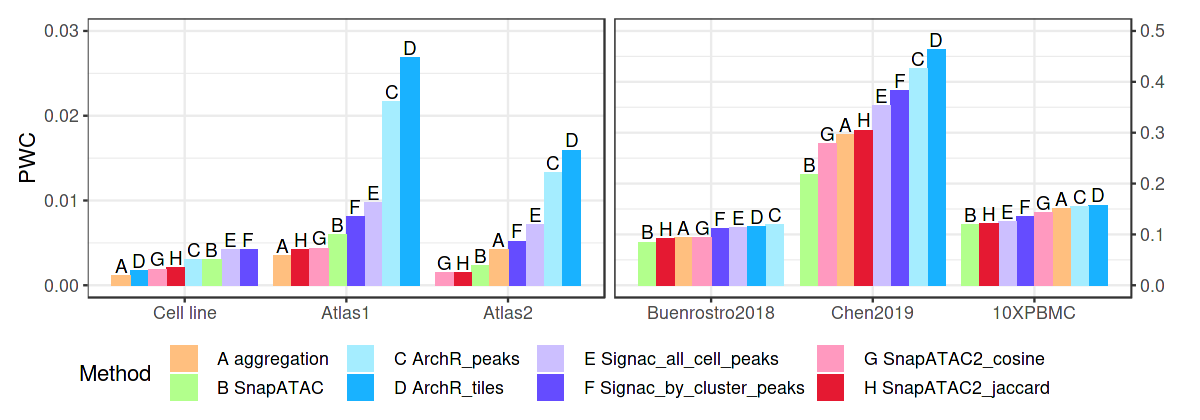

In [29]:
options(repr.plot.width=10, repr.plot.height=3.5)

p2.3.1 <- df_gs %>% 
        filter(dataset_type =="1") %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="PWC", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_method) +
        ylim(0, 0.03) +
        theme_bw() +
        geom_col(position = "dodge") +
        geom_text(aes(label = method_short,vjust = ifelse(average > 0, -0.2, 1)), position = position_dodge(.9)) +
        theme(text = element_text(size = 13),legend.position = "none") #+ coord_cartesian(ylim = c(1, 2))

p2.3.2 <- df_gs %>% 
        filter(dataset_type =="2") %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = method_name, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_method) +
        theme_bw() +
        geom_col(position = "dodge") +
        geom_text(aes(label = method_short,vjust = ifelse(average > 0, -0.2, 1)), position = position_dodge(.9)) +
        theme(text = element_text(size = 13),
              legend.position = "bottom", 
              legend.justification = c(1.2,0), 
              legend.margin = margin(t = -15, r = 0, b = 0, l = 0, unit = "pt"),
              legend.spacing.x = unit(0.4, 'cm'),
              plot.margin = unit(c(0,0,0,0), "cm")) +
        scale_y_continuous(position = "right") + coord_cartesian(ylim = c(0, 0.5))

p2.3.3 <- p2.3.1 + p2.3.2 + theme(plot.margin = unit(c(0, 0, -1, 0), "cm"))
p2.3.3

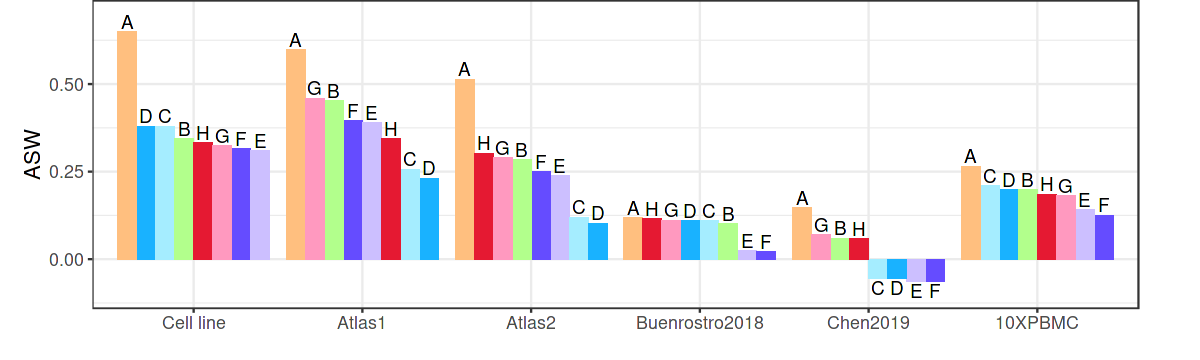

In [30]:
options(repr.plot.width=10, repr.plot.height=3)

p3.2 <- df_metrics_silhouette_s %>% 
        group_by(dataset) %>% 
        mutate(position = rank(-average)) %>%
        ggplot(aes(x = dataset, y = average, fill = long_method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="ASW", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_method) +
        ylim(-0.1, 0.7) +
        theme_bw() +
        geom_col(position = "dodge") +
        geom_text(aes(label = method_short,vjust = ifelse(average > 0, -0.2, 1.2)), position = position_dodge(.9)) +
        theme(text = element_text(size = 13),legend.position = "none", plot.margin = unit(c(0,1.3,0,0.5), "cm")) #+ coord_cartesian(ylim = c(1, 2))

p3.2

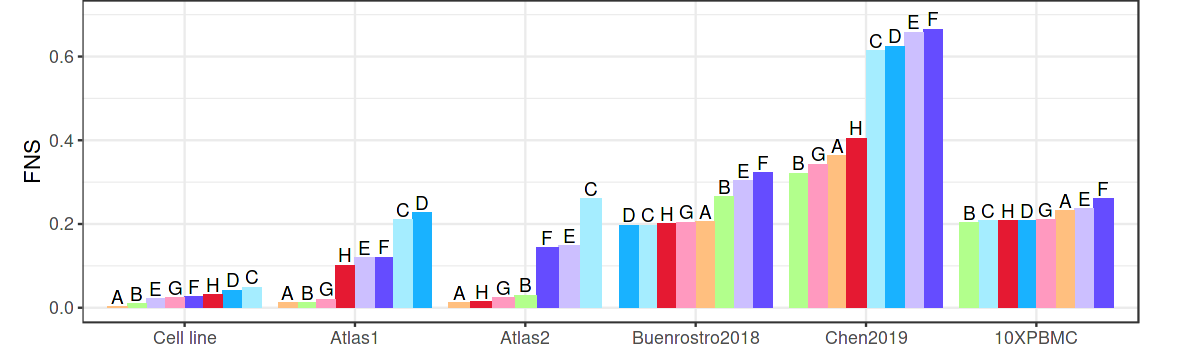

In [31]:
options(repr.plot.width=10, repr.plot.height=3)

p4.2 <- df_sil_frac %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = long_method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="FNS", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_method) +
        theme_bw() + 
        ylim(0, 0.7) + 
        geom_col(position = "dodge") +
        geom_text(aes(label = method_short,vjust = ifelse(average > 0, -0.2, 1)), position = position_dodge(.9)) +
        theme(text = element_text(size = 13),legend.position = "none", plot.margin = unit(c(0,1.3,-0.3,0.5), "cm")) #+ coord_cartesian(ylim = c(1, 2))

p4.2

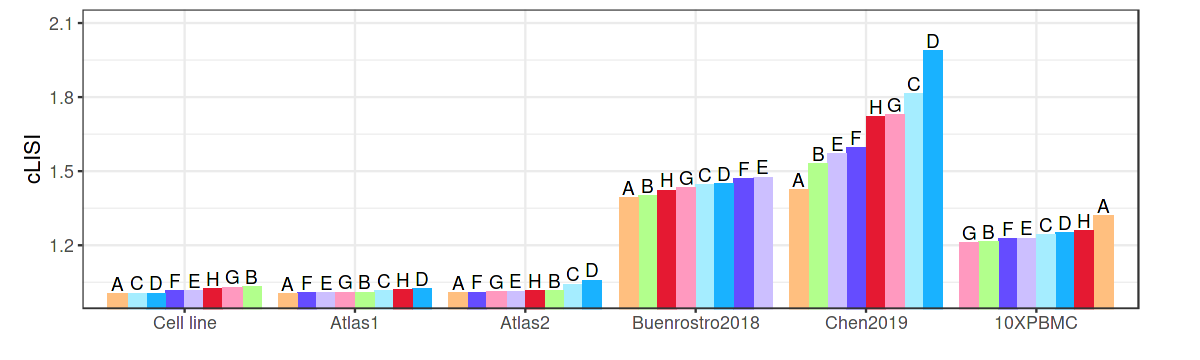

In [32]:
options(repr.plot.width=10, repr.plot.height=3)
p5.2 <- df_lisi_avg %>% 
        group_by(dataset) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset, y = average, fill = method_name, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="cLISI", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_method) +
        theme_bw() +
        geom_col(position = "dodge") +
        geom_text(aes(label = method_short, vjust = ifelse(average > 0, -0.2, 1)), position = position_dodge(.9)) +
        
        theme(text = element_text(size = 13),legend.position = "none", plot.margin = unit(c(0.2,1.3,0,0.5), "cm")) + 
        coord_cartesian(ylim = c(1, 2.1))

p5.2

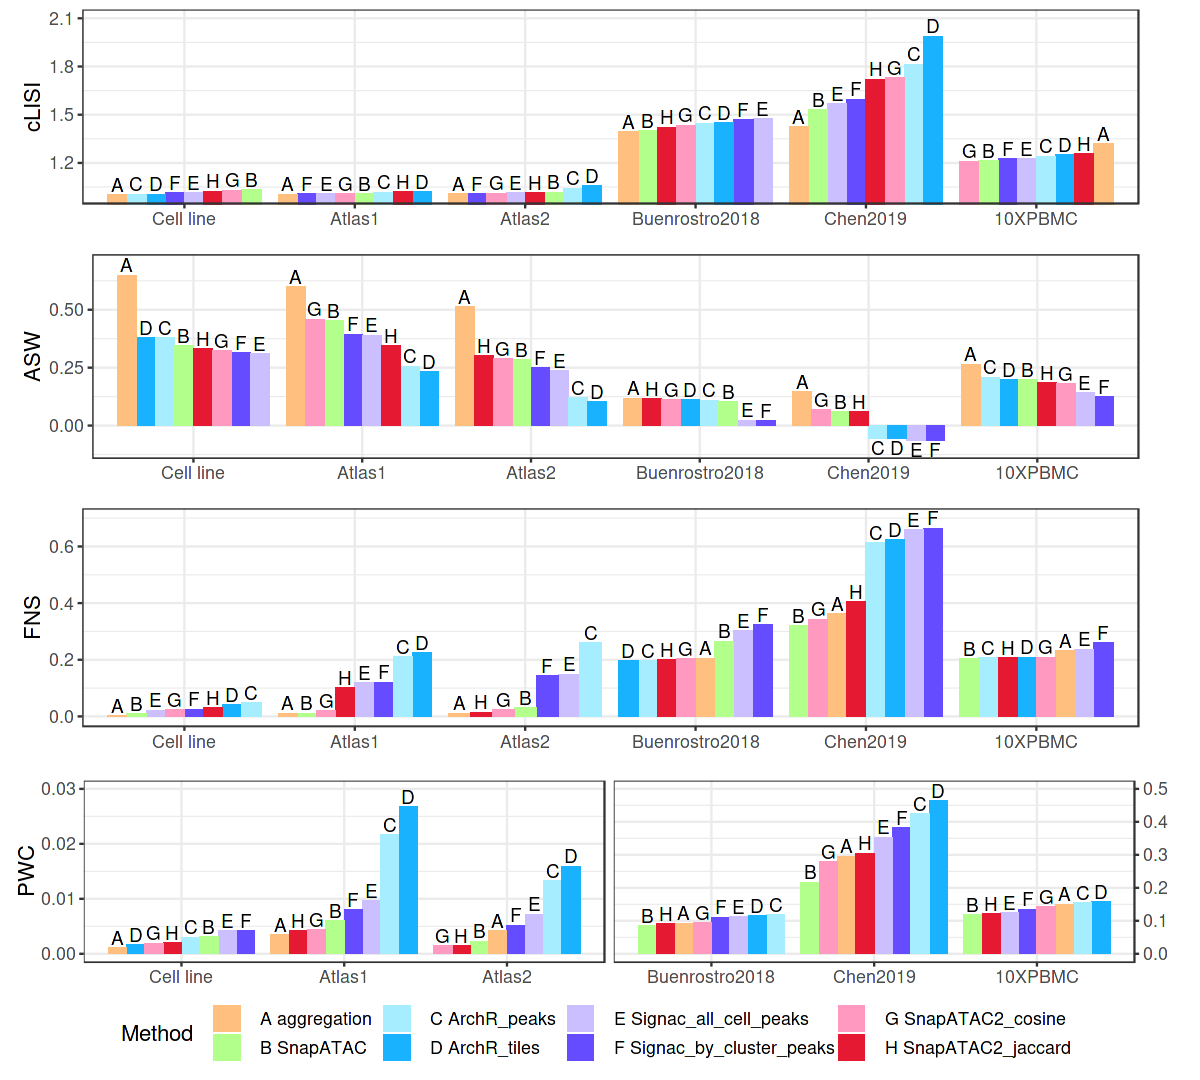

In [33]:
options(repr.plot.width=10, repr.plot.height=9)
p6 <- ggarrange(p5.2, p3.2, p4.2, p2.3.3, nrow = 4, ncol = 1, heights = c(4,4,4,5)) 
p6

In [34]:
pdf("../figures/Fig2.pdf", width=10, height=9)
plot(p6)
dev.off() 

png 
  2

# Fig 3: ARI

In [35]:
df_metrics_ari <- df_metrics %>% filter(metric == "ARI") %>% filter(ndim == 15)

In [36]:
vline_data <- data.frame(dataset = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"), vline_x = k_ls)
vline_data$dataset <- factor(vline_data$dataset, levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))

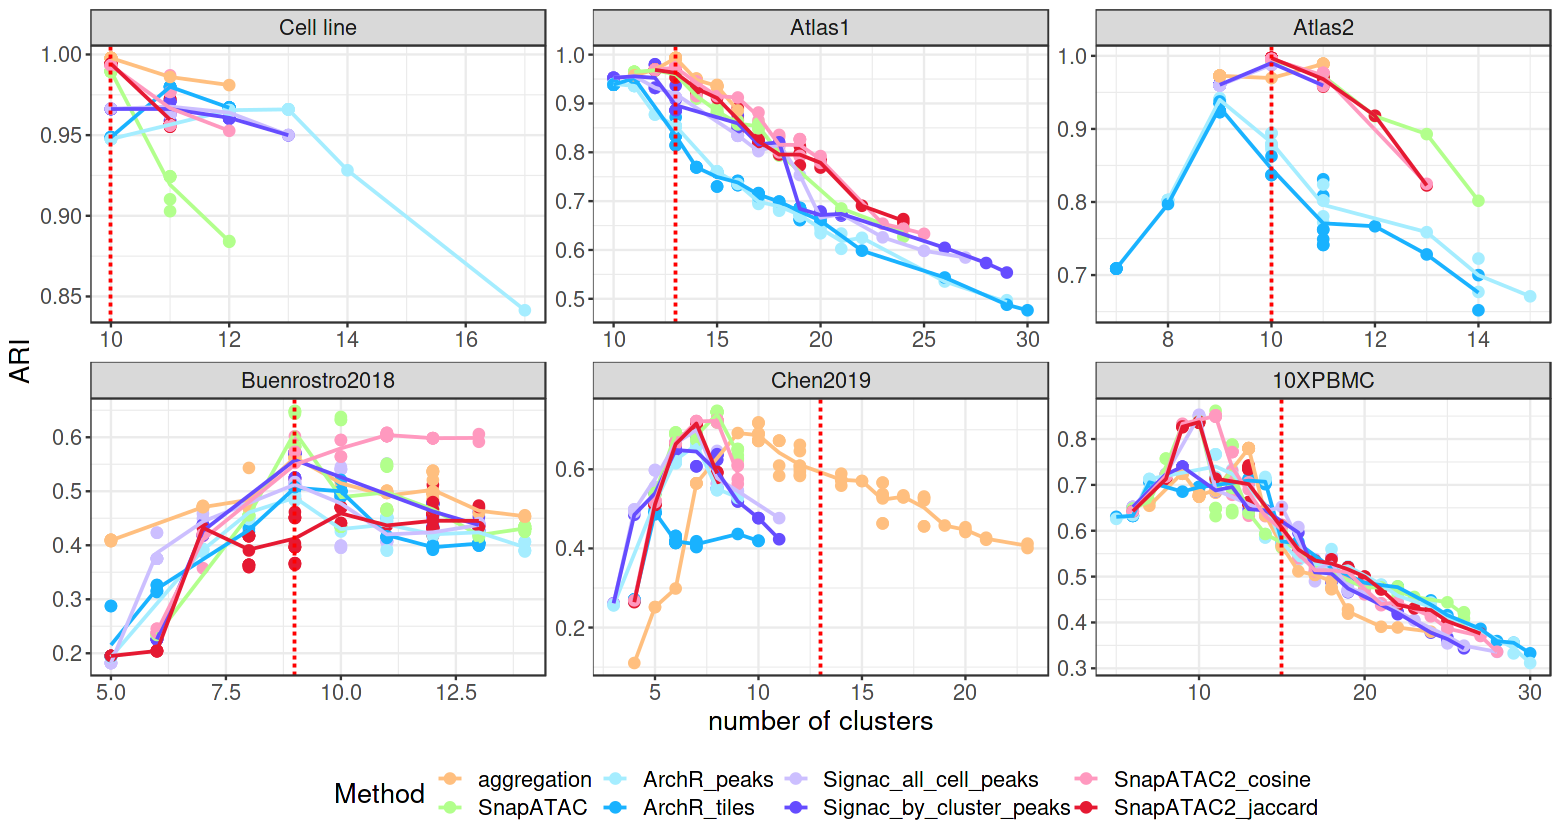

In [77]:
# ARI
options(repr.plot.width=13, repr.plot.height=7)

p1 <-
df_metrics_ari %>% 
  group_by(dataset, long_method, n_clusters) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=long_method)) + 
  geom_point(size=2.5) +
  geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=long_method)) + 
  facet_wrap(~dataset, scales = "free", nrow = 2, ncol = 3) + 
  geom_vline(data = vline_data, aes(xintercept = vline_x), linetype = "dashed", color = "red", size=0.8) + 
  xlab("number of clusters") +
  ylab("ARI") +
  labs(color="Method") +
  theme_bw() +
  theme(text = element_text(size = 16),legend.position = "bottom") +
  scale_colour_manual(values = my_col_method)
p1

In [38]:
pdf("../figures/Fig3a.pdf", width=13, height=7)
plot(p1)
dev.off() 

png 
  2

# Fig S1: ARI2

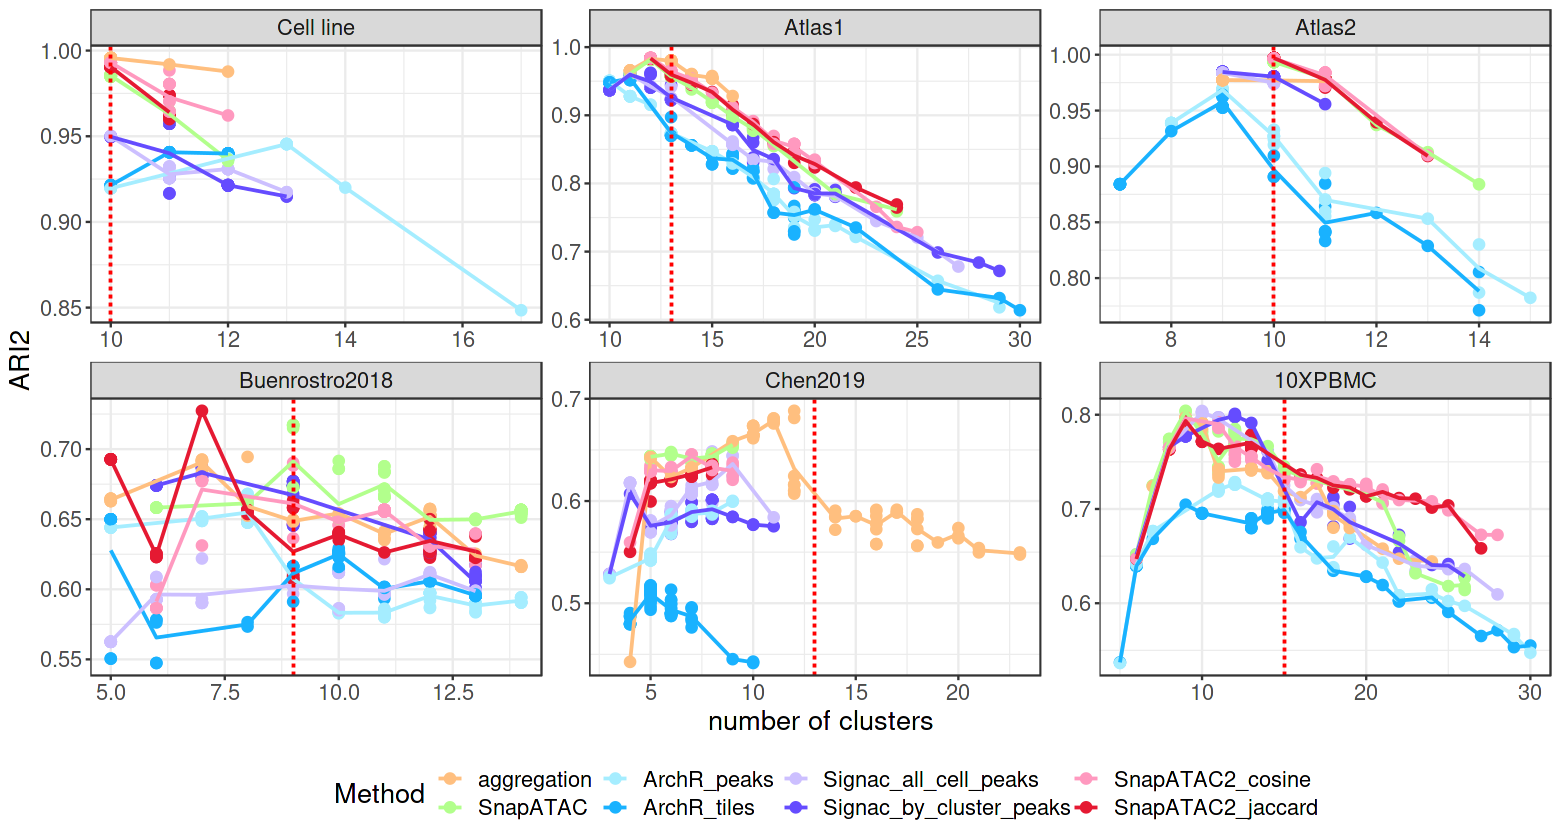

In [39]:
options(repr.plot.width=13, repr.plot.height=7)

df_metrics_ari2 <- df_metrics %>% filter(metric == "ARI2") %>% filter(ndim == 15)

p2 <-
df_metrics_ari2 %>% 
  group_by(dataset, long_method, n_clusters) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=long_method)) + 
  geom_point(size=2.5) +
  geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=long_method)) + 
  facet_wrap(~dataset, scales = "free", nrow = 2, ncol = 3) + 
  geom_vline(data = vline_data, aes(xintercept = vline_x), linetype = "dashed", color = "red", size=0.8) + 
  xlab("number of clusters") +
  ylab("ARI2") +
  labs(color="Method") +
  theme_bw() +
  theme(text = element_text(size = 16),legend.position = "bottom") +
  scale_colour_manual(values = my_col_method)
p2

In [40]:
pdf("../figures/FigS1a.pdf", width=13, height=7)
plot(p2)
dev.off() 

png 
  2

# Fig S5

In [41]:
df_lisi_avg$metric <- "cLISI"
df_gs$metric <- "PWC"
df_sil_frac$metric <- "FNS"
df_sil_frac$method_name <- as.character(df_sil_frac$method_name)
df_sil_frac$method_short <- as.character(df_sil_frac$method_short)

df_lisi_avg <- df_lisi_avg[,c("long_method", "dataset", "average", "method_name", "method_short", "metric")]
df_gs <- df_gs[,c("method", "dataset_short", "average", "method_name", "method_short", "metric")]
df_sil_frac <- df_sil_frac[,c("long_method", "dataset_short", "average", "method_name", "method_short", "metric")]

names(df_gs)[names(df_gs)=="method"] <- "long_method"
names(df_gs)[names(df_gs)=="dataset_short"] <- "dataset"
names(df_sil_frac)[names(df_sil_frac)=="dataset_short"] <- "dataset"

In [42]:
head(df_lisi_avg)
head(df_gs)
head(df_sil_frac)

long_method             dataset   average  method_name              
1 Signac_by_cluster_peaks Cell line 1.014761 F Signac_by_cluster_peaks
2 Signac_all_cell_peaks   Cell line 1.015117 E Signac_all_cell_peaks  
3 ArchR_tiles             Cell line 1.005888 D ArchR_tiles            
4 ArchR_peaks             Cell line 1.005708 C ArchR_peaks            
5 SnapATAC                Cell line 1.031597 B SnapATAC               
6 aggregation             Cell line 1.003258 A aggregation            
  method_short metric
1 F            cLISI 
2 E            cLISI 
3 D            cLISI 
4 C            cLISI 
5 B            cLISI 
6 A            cLISI

long_method             dataset   average     method_name              
1 Signac_by_cluster_peaks Cell line 0.004244095 F Signac_by_cluster_peaks
2 Signac_all_cell_peaks   Cell line 0.004163120 E Signac_all_cell_peaks  
3 ArchR_tiles             Cell line 0.001719935 D ArchR_tiles            
4 ArchR_peaks             Cell line 0.003004065 C ArchR_peaks            
5 SnapATAC                Cell line 0.003063441 B SnapATAC               
6 aggregation             Cell line 0.001146118 A aggregation            
  method_short metric
1 F            PWC   
2 E            PWC   
3 D            PWC   
4 C            PWC   
5 B            PWC   
6 A            PWC

long_method             dataset   average     method_name              
1 Signac_by_cluster_peaks Cell line 0.025694690 F Signac_by_cluster_peaks
2 Signac_all_cell_peaks   Cell line 0.021946829 E Signac_all_cell_peaks  
3 ArchR_tiles             Cell line 0.042045451 D ArchR_tiles            
4 ArchR_peaks             Cell line 0.049399456 C ArchR_peaks            
5 SnapATAC                Cell line 0.010093875 B SnapATAC               
6 aggregation             Cell line 0.002173432 A aggregation            
  method_short metric
1 F            FNS   
2 E            FNS   
3 D            FNS   
4 C            FNS   
5 B            FNS   
6 A            FNS

In [43]:
df_compare <- rbind(df_lisi_avg, df_sil_frac, df_gs)

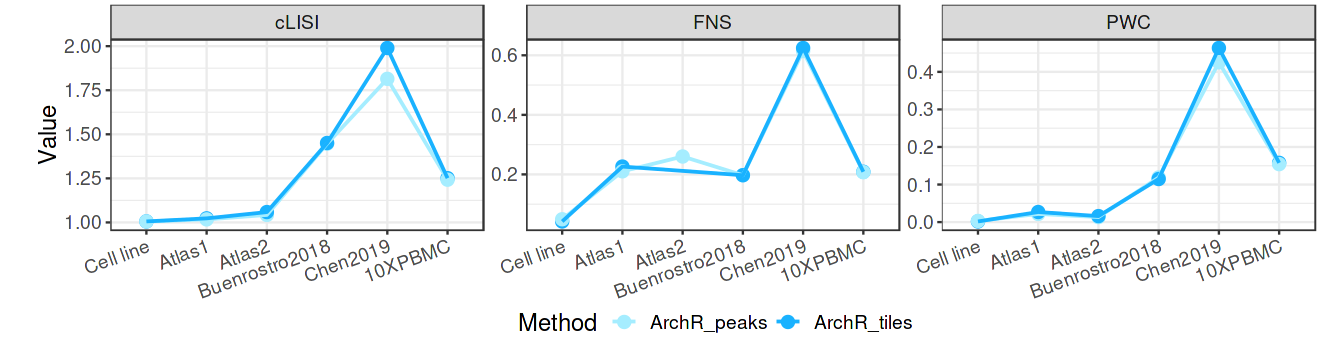

In [44]:
# options(repr.plot.width=11, repr.plot.height=3)

# p1 <-
# df_compare %>% filter(long_method %in% c("ArchR_tiles", "ArchR_peaks")) %>%
#   ggplot(aes(x=dataset, y=average, color=long_method)) + 
#   geom_point(size=3) +
#   geom_line(size=0.8, aes(x=dataset, y=average, group=long_method)) + 
#   facet_wrap(~metric, scales = "free", nrow = 1, ncol = 3) + 
#   xlab("") +
#   ylab("Value") +
#   labs(color="Method") +
#   theme_bw() +
#   theme(text = element_text(size = 14),
#   legend.position = "bottom", 
#   # legend.justification = c(1.2,0), 
#   legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
#   # legend.spacing.x = unit(0.4, 'cm'),
#   plot.margin = unit(c(0.1,0.1,0.5,0.8), "cm"),
#   axis.text.x = element_text(angle = 20, hjust=1)) +
#   scale_colour_manual(values = my_col_method[c(3,4)]) #+ ylim(0, 0.8)
# p1

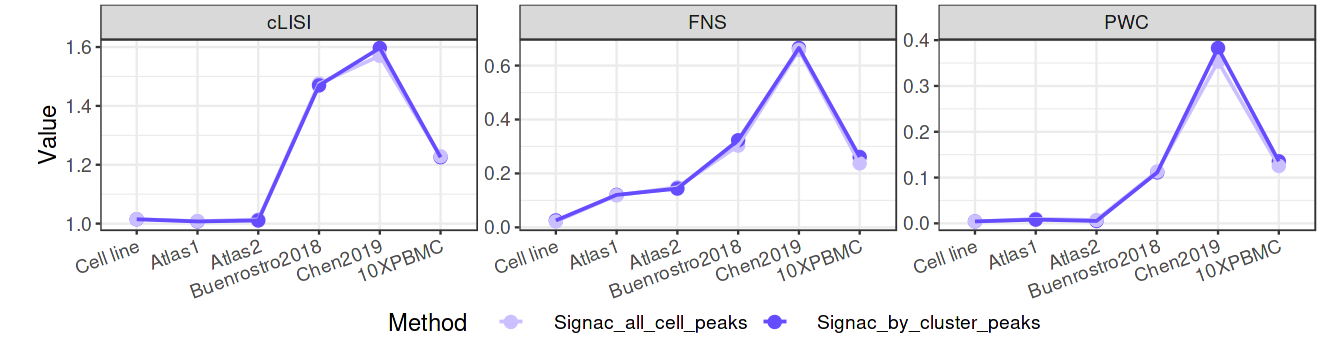

In [45]:
# options(repr.plot.width=11, repr.plot.height=3)

# p2 <-
# df_compare %>% filter(long_method %in% c("Signac_all_cell_peaks", "Signac_by_cluster_peaks")) %>%
#   ggplot(aes(x=dataset, y=average, color=long_method)) + 
#   geom_point(size=3) +
#   geom_line(size=0.8, aes(x=dataset, y=average, group=long_method)) + 
#   facet_wrap(~metric, scales = "free", nrow = 1, ncol = 3) + 
#   xlab("") +
#   ylab("Value") +
#   labs(color="Method") +
#   theme_bw() +
#   theme(text = element_text(size = 14),
#   legend.position = "bottom", 
#   # legend.justification = c(1.2,0), 
#   legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
#   legend.spacing.x = unit(0.6, 'cm'),
#   plot.margin = unit(c(0.1,0.1,0.5,0.8), "cm"),
#   axis.text.x = element_text(angle = 20, hjust=1)) +
#   scale_colour_manual(values = my_col_method[c(5,6)]) #+ ylim(0, 0.8)
# p2

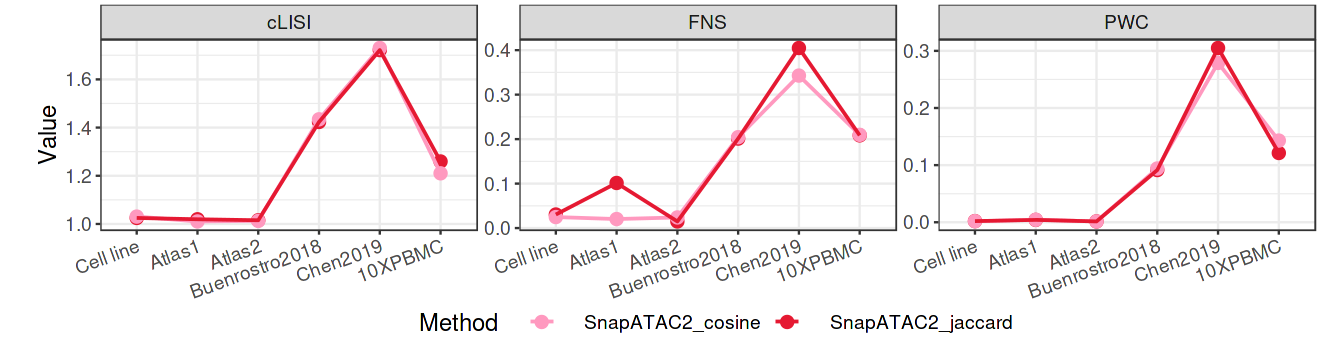

In [46]:
# options(repr.plot.width=11, repr.plot.height=3)

# p3 <-
# df_compare %>% filter(long_method %in% c("SnapATAC2_jaccard", "SnapATAC2_cosine")) %>%
#   ggplot(aes(x=dataset, y=average, color=long_method)) + 
#   geom_point(size=3) +
#   geom_line(size=0.8, aes(x=dataset, y=average, group=long_method)) + 
#   facet_wrap(~metric, scales = "free", nrow = 1, ncol = 3) + 
#   xlab("") +
#   ylab("Value") +
#   labs(color="Method") +
#   theme_bw() +
#   theme(text = element_text(size = 14),
#   legend.position = "bottom", 
#   # legend.justification = c(1.2,0), 
#   legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
#   legend.spacing.x = unit(0.6, 'cm'),
#   plot.margin = unit(c(0.1,0.1,0.5,0.8), "cm"),
#   axis.text.x = element_text(angle = 20, hjust=1)) +
#   scale_colour_manual(values = my_col_method[c(7,8)]) #+ ylim(0, 0.8)
# p3

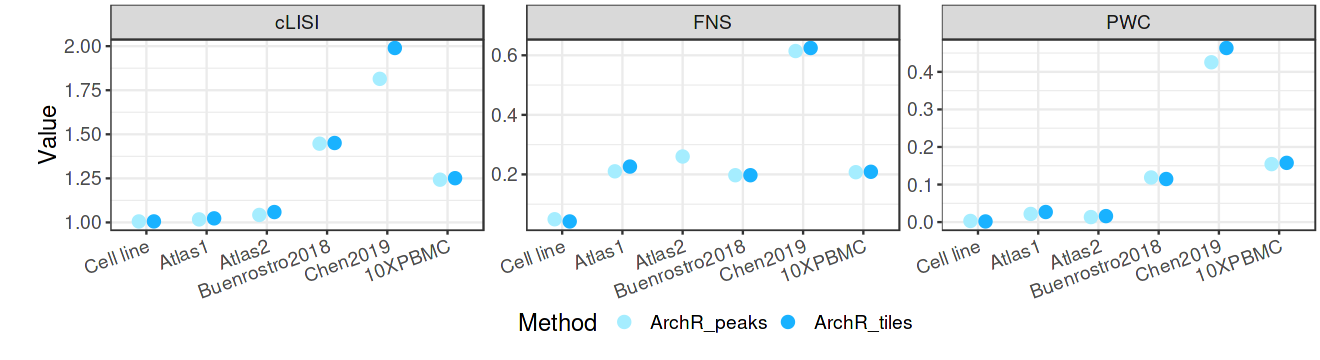

In [63]:
options(repr.plot.width=11, repr.plot.height=3)

p1 <-
df_compare %>% filter(long_method %in% c("ArchR_tiles", "ArchR_peaks")) %>%
  ggplot(aes(x=dataset, y=average, color=long_method)) + 
  geom_point(size=3, position=position_dodge(width=0.5)) +
  # geom_line(size=0.8, aes(x=dataset, y=average, group=long_method)) + 
  facet_wrap(~metric, scales = "free", nrow = 1, ncol = 3) + 
  xlab("") +
  ylab("Value") +
  labs(color="Method") +
  theme_bw() +
  theme(text = element_text(size = 14),
  legend.position = "bottom", 
  # legend.justification = c(1.2,0), 
  legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
  # legend.spacing.x = unit(0.4, 'cm'),
  plot.margin = unit(c(0.1,0.1,0.5,0.8), "cm"),
  axis.text.x = element_text(angle = 20, hjust=1)) +
  scale_colour_manual(values = my_col_method[c(3,4)]) #+ ylim(0, 0.8)
p1

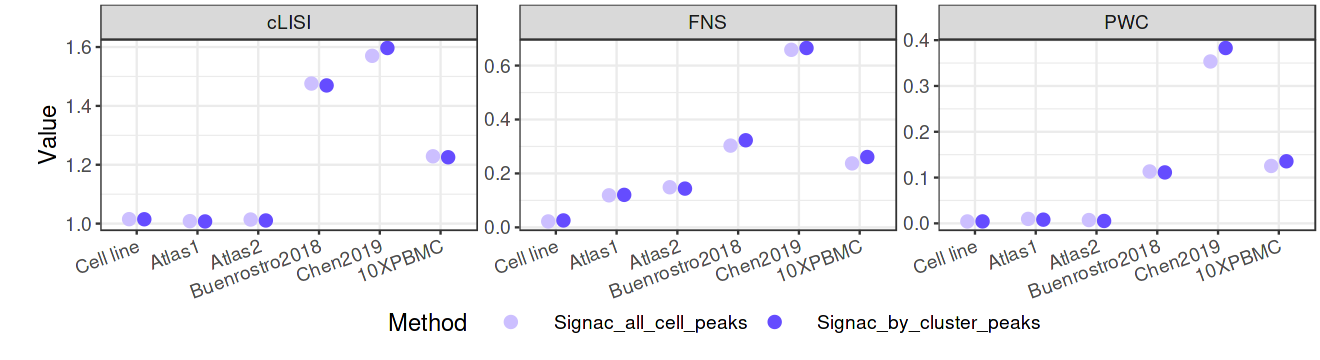

In [64]:
options(repr.plot.width=11, repr.plot.height=3)

p2 <-
df_compare %>% filter(long_method %in% c("Signac_all_cell_peaks", "Signac_by_cluster_peaks")) %>%
  ggplot(aes(x=dataset, y=average, color=long_method)) + 
  geom_point(size=3, position=position_dodge(width=0.5)) +
  # geom_line(size=0.8, aes(x=dataset, y=average, group=long_method)) + 
  facet_wrap(~metric, scales = "free", nrow = 1, ncol = 3) + 
  xlab("") +
  ylab("Value") +
  labs(color="Method") +
  theme_bw() +
  theme(text = element_text(size = 14),
  legend.position = "bottom", 
  # legend.justification = c(1.2,0), 
  legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
  legend.spacing.x = unit(0.6, 'cm'),
  plot.margin = unit(c(0.1,0.1,0.5,0.8), "cm"),
  axis.text.x = element_text(angle = 20, hjust=1)) +
  scale_colour_manual(values = my_col_method[c(5,6)]) #+ ylim(0, 0.8)
p2

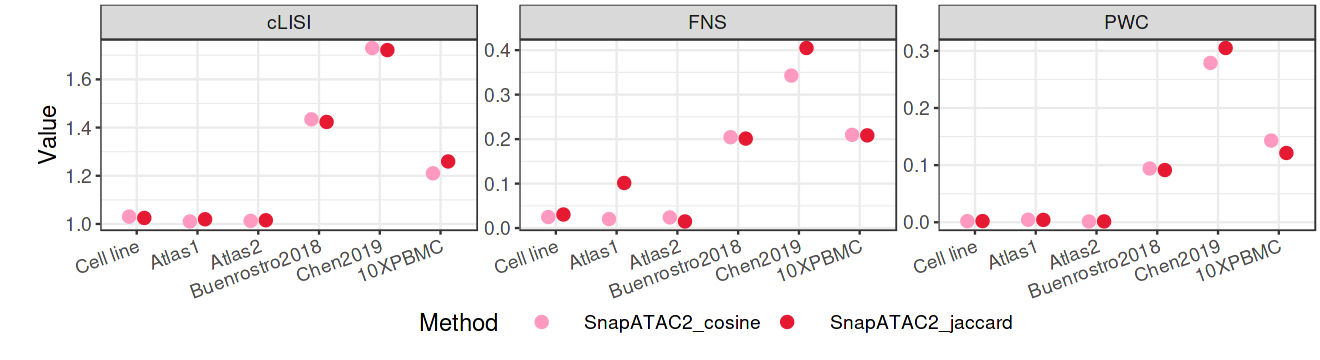

In [65]:
options(repr.plot.width=11, repr.plot.height=3)

p3 <-
df_compare %>% filter(long_method %in% c("SnapATAC2_jaccard", "SnapATAC2_cosine")) %>%
  ggplot(aes(x=dataset, y=average, color=long_method)) + 
  geom_point(size=3, position=position_dodge(width=0.5)) +
#   geom_line(size=0.8, aes(x=dataset, y=average, group=long_method)) + 
  facet_wrap(~metric, scales = "free", nrow = 1, ncol = 3) + 
  xlab("") +
  ylab("Value") +
  labs(color="Method") +
  theme_bw() +
  theme(text = element_text(size = 14),
  legend.position = "bottom", 
  # legend.justification = c(1.2,0), 
  legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
  legend.spacing.x = unit(0.6, 'cm'),
  plot.margin = unit(c(0.1,0.1,0.5,0.8), "cm"),
  axis.text.x = element_text(angle = 20, hjust=1)) +
  scale_colour_manual(values = my_col_method[c(7,8)]) #+ ylim(0, 0.8)
p3

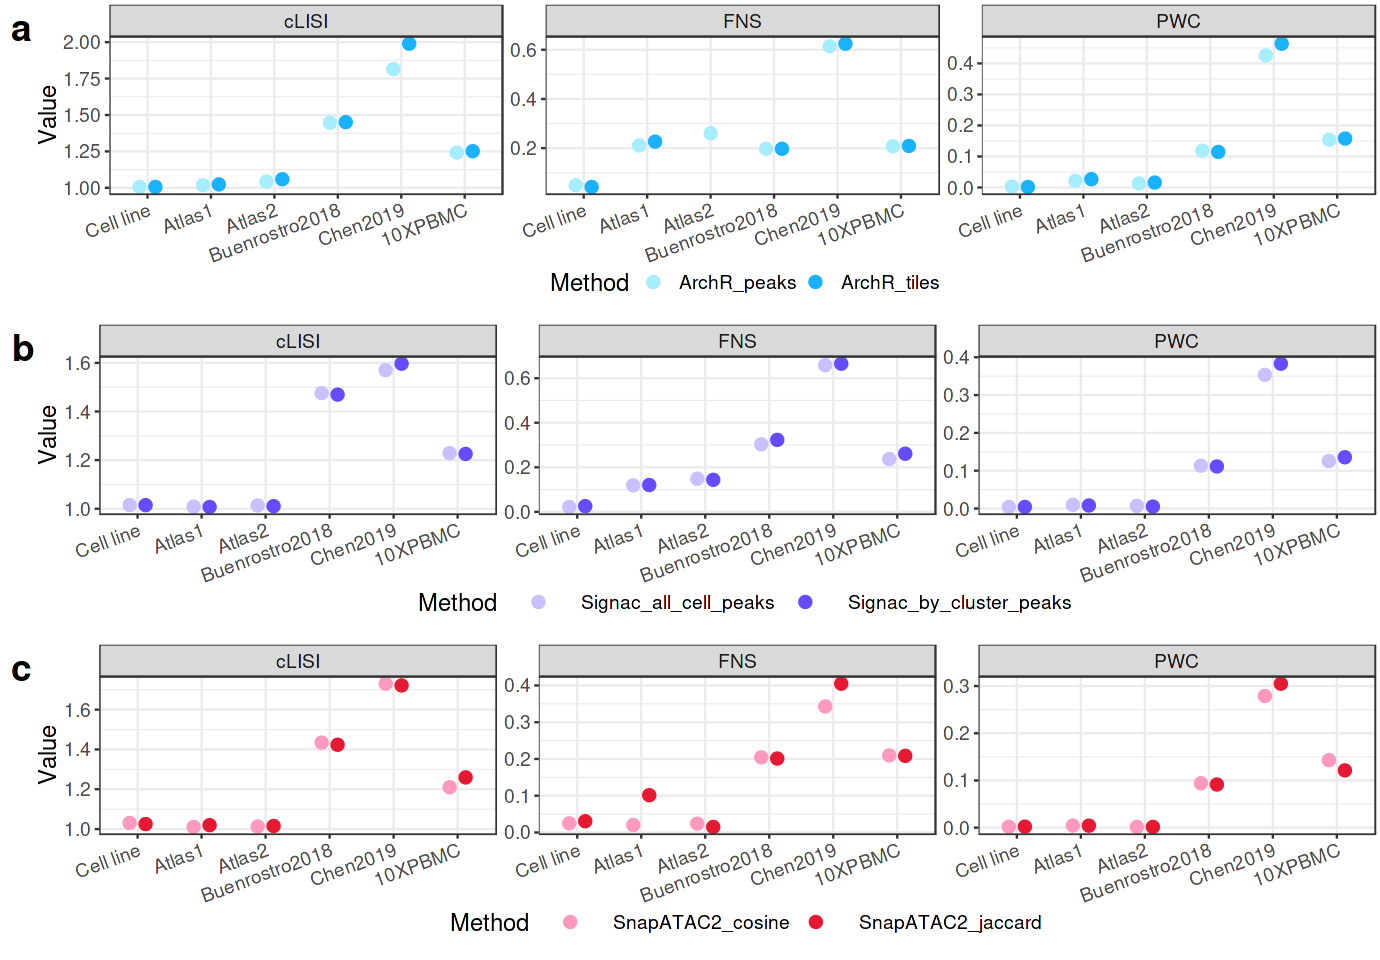

In [66]:
library(ggpubr)
options(repr.plot.width=11.5, repr.plot.height=8)
p4 <- ggarrange(p1, p2, p3, 
          labels = c("a", "b", "c"),font.label=list(color="black",size=22, face="bold"),
          ncol = 1, nrow = 3)
p4


In [67]:
pdf(paste0("../figures/FigS5.pdf"), width=11.5, height=8)
print(p4)
dev.off() 

png 
  2

# Fig 3b: AUC

## Calculating AUC

In [49]:
library(pracma)


Attaching package: ‘pracma’


The following object is masked from ‘package:MESS’:

    repmat




In [14]:
df_metrics_selected <- df_metrics %>% filter(ndim==15) %>% filter(metric %in% c("ARI", "ARI2","AMI", "AV", "AW", "MI", "VI"))
dim(df_metrics_selected)

[1] 19649    17

In [15]:
df_metrics_filtered <- df_metrics_selected %>% group_by(dataset, long_method, metric) %>%
  # filter(value != min(value)) %>%
  group_by(dataset, long_method, n_clusters, metric) %>%
  mutate(mean_value = mean(value)) %>%
  ungroup() 

df_metrics_filtered <- df_metrics_filtered[!duplicated(subset(df_metrics_filtered, select = c(n_clusters,metric,long_method, dataset))), ]

dim(df_metrics_filtered)

[1] 2905   18

In [52]:
df_metrics_filtered <- df_metrics_filtered %>% 
    group_by(dataset, metric) %>%
  mutate(upper_bound = max(mean_value)) %>%
  ungroup() 
df_metrics_filtered$upper_bound[!df_metrics_filtered$metric %in% c("MI", "VI")] <- 1


In [53]:
df_auc <- df_metrics_filtered[order(df_metrics_filtered$long_method, df_metrics_filtered$dataset, df_metrics_filtered$metric, df_metrics_filtered$n_clusters),] %>% 
    group_by(dataset, long_method, metric) %>% 
    mutate(auc=trapz(n_clusters, mean_value), total_area=trapz(n_clusters, upper_bound)) %>% 
    mutate(auc_frac=auc/total_area)
df_auc <- df_auc[!duplicated(subset(df_auc, select = c(metric, long_method, dataset))), ]

df_auc$auc_frac[df_auc$metric=="VI"] <- 1-df_auc$auc_frac[df_auc$metric=="VI"]
dim(df_auc)
head(df_auc)

[1] 336  22

n_clusters metric value     method      long_method feature_type tile_size
1 10         AMI    0.9953377 aggregation aggregation default      500      
2 10         ARI    0.9977881 aggregation aggregation default      500      
3 10         ARI2   0.9956534 aggregation aggregation default      500      
4 10         AV     0.9982032 aggregation aggregation default      500      
5 10         AW     0.9973734 aggregation aggregation default      500      
6 10         MI     2.1421204 aggregation aggregation default      500      
  distance ndim resolution ⋯
1 default  15   0.05       ⋯
2 default  15   0.05       ⋯
3 default  15   0.05       ⋯
4 default  15   0.05       ⋯
5 default  15   0.05       ⋯
6 default  15   0.05       ⋯
  snn_file                                                                   
1 Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS
2 Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS
3 Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS
4 Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS
5 Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS
6 Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS
  seed dataset   k_optimal dataset2         mean_value upper_bound auc     
1 0    Cell line 10        Cell_line_mixing 0.9953377  1.000000    1.966108
2 0    Cell line 10        Cell_line_mixing 0.9977881  1.000000    1.975438
3 0    Cell line 10        Cell_line_mixing 0.9956534  1.000000    1.983580
4 0    Cell line 10        Cell_line_mixing 0.9982032  1.000000    1.996414
5 0    Cell line 10        Cell_line_mixing 0.9973734  1.000000    1.955048
6 0    Cell line 10        Cell_line_mixing 2.1421204  2.142314    4.284338
  total_area auc_frac 
1 2.000000   0.9830542
2 2.000000   0.9877191
3 2.000000   0.9917899
4 2.000000   0.9982069
5 2.000000   0.9775241
6 4.284629   0.9999320

In [54]:
df_auc$dataset <- factor(df_auc$dataset, levels = dataset_name)

## MAD scaling

In [55]:
library(ComplexHeatmap)
library(circlize)

Loading required package: grid



ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualizati

In [56]:
colCenterScale <- function(x, centerFn=median, 
                           scaleFn=function(x,na.rm) median(abs(x),na.rm=na.rm)
                           ){
  if(is.null(dim(x))) stop("`x` should be a numeric matrix or data.frame.")
  centers <- apply(x, MARGIN=2, na.rm=TRUE, FUN=centerFn)
  x2 <- t(t(x)-centers)
  x2 <- x2/scaleFn(x2, na.rm=TRUE)    # why this denominator???
  if(all(is.na(x2))) x2[is.na(x2)] <- 0
  x2
}

In [44]:
hm_metric <- function(df_auc, col_ls, col_fun, name, col_title){
    df_pl <- df_auc[,c("metric", "long_method", "auc_frac", 'dataset')]
    df_wide <- pivot_wider(df_pl, names_from = dataset, values_from = auc_frac)
    long_method_vec <- as.character(df_wide$long_method)
    df_wide <- df_wide[,c("Cell line", "Atlas1", "Atlas2", "Buenrostro2018", "Chen2019", "10XPBMC")]
    df_wide2 <- df_wide
    df_wide <- as.data.frame(colCenterScale(df_wide))
    rownames(df_wide) <- long_method_vec
    maxv <- max(abs(df_wide[!is.na(df_wide)]))
    # col_fun <- colorRamp2(c(-maxv,-maxv/2, 0, maxv/2, maxv), c("green", "#66FF66", "white", "#FF6666", "red"))

    column_ha = HeatmapAnnotation(dataset=c("Cell line", "Atlas1", "Atlas2", "Buenrostro2018", "Chen2019", "10XPBMC"), 
                                  col = list(dataset= col_ls),  
                                  show_annotation_name = FALSE,
                                  annotation_legend_param = list(dataset = list(
                                ncol = 1, 
                                # nrow = 1, 
                                title = "Datasets", 
                                # title_position = "topcenter",
                                # title_position = "leftcenter",
                                at = c("Cell line", "Atlas1", "Atlas2", "Buenrostro2018", "Chen2019", "10XPBMC"))))
                                # labels = c("Cell line", "Atlas1", "Atlas2", "Buenrostro2018", "Chen2019", "10XPBMC"))),
                                # column_order = c("Cell line", "Atlas1", "Atlas2", "Buenrostro2018", "Chen2019", "10XPBMC"))
    ht <- Heatmap(df_wide, 
    name = name, 
    col = col_fun, 
    cluster_rows = FALSE, 
    cluster_columns = FALSE, 
    column_title = col_title,
    rect_gp = gpar(col = "white", lwd = 2), 
    bottom_annotation = column_ha, show_column_names = FALSE,
    heatmap_legend_param = list(title = "MADs", at=c(-maxv, 0, maxv), labels=c("worst","median","best")), 
    show_heatmap_legend = FALSE, border = TRUE,
    cell_fun = function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.2f", df_wide2[i, j]), x, y, gp = gpar(fontsize = 10))},
    # column_order = c(6,2,3,4,1,5)
    column_order = c("Cell line", "Atlas1", "Atlas2", "Buenrostro2018", "Chen2019", "10XPBMC"),
    row_order = c("aggregation", "SnapATAC2_cosine", "SnapATAC2_jaccard", "SnapATAC", "Signac_by_cluster_peaks", "Signac_all_cell_peaks", "ArchR_peaks", "ArchR_tiles")
    )

    return(list(ht=ht, maxv=maxv))
}

In [45]:
my_col_c <- my_col_d
names(my_col_c) <- NULL
col_ls <- c('Cell line' = my_col_c[1],
'Atlas1' = my_col_c[2],
'Atlas2' = my_col_c[3],
'Buenrostro2018' = my_col_c[4],
'Chen2019' = my_col_c[5],
'10XPBMC' = my_col_c[6])

In [46]:
maxv <- 18
col_fun = colorRamp2(c(-maxv, -maxv/2, 0, maxv/2, maxv), c("green", "#66FF66", "white", "#FF6666", "red"))
col_fun = colorRamp2(c(-maxv, -maxv/2, 0, maxv/2, maxv), c("blue", "#3333FF", "white", "#FF3333", "red"))

df_auc_sub <- df_auc %>% filter(metric == "ARI")
res <- hm_metric(df_auc_sub, col_ls, col_fun, "ari", "ARI")
hm_ari <- res$ht
maxv <- res$maxv

df_auc_sub <- df_auc %>% filter(metric == "ARI2")
res <- hm_metric(df_auc_sub, col_ls, col_fun, "ari2", "ARI2")
hm_ari2 <- res$ht
maxv <- max(c(maxv, res$maxv))

df_auc_sub <- df_auc %>% filter(metric == "AMI")
res <- hm_metric(df_auc_sub, col_ls, col_fun, "ami", "AMI")
hm_ami <- res$ht
maxv <- max(c(maxv, res$maxv))

df_auc_sub <- df_auc %>% filter(metric == "AV")
res <- hm_metric(df_auc_sub, col_ls, col_fun, "av", "AV")
hm_av <- res$ht
maxv <- max(c(maxv, res$maxv))

df_auc_sub <- df_auc %>% filter(metric == "AW")
res <- hm_metric(df_auc_sub, col_ls, col_fun, "aw", "AW")
hm_aw <- res$ht
maxv <- max(c(maxv, res$maxv))

df_auc_sub <- df_auc %>% filter(metric == "MI")
res <- hm_metric(df_auc_sub, col_ls, col_fun, "mi", "MI")
hm_mi <- res$ht
maxv <- max(c(maxv, res$maxv))

df_auc_sub <- df_auc %>% filter(metric == "VI")
res <- hm_metric(df_auc_sub, col_ls, col_fun, "vi", "VI")
hm_vi <- res$ht
maxv <- max(c(maxv, res$maxv))

Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message:
“The input is a data frame-like object, convert it to a matrix.”


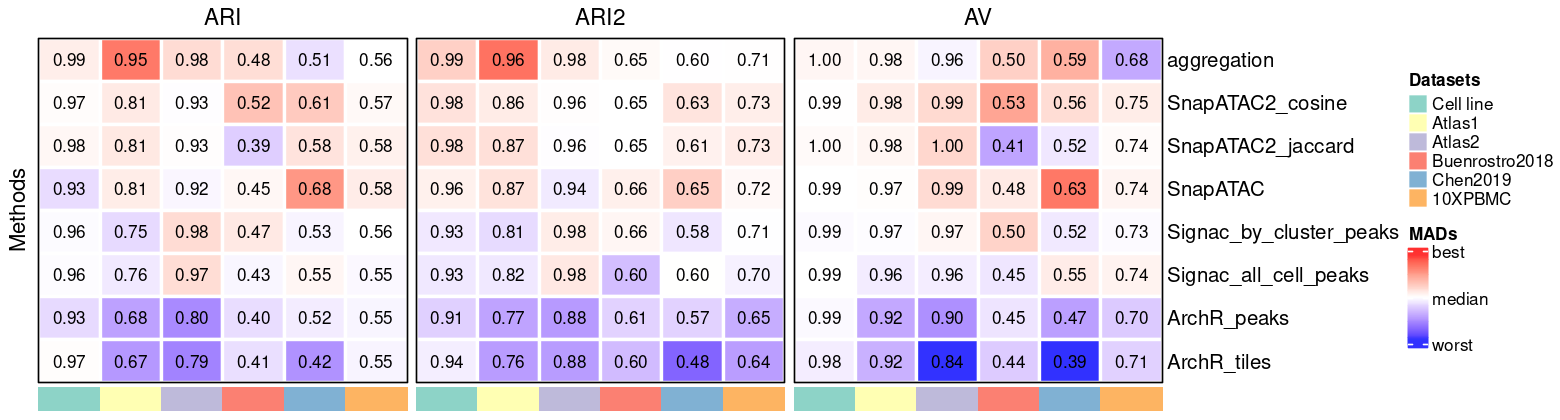

In [47]:
options(repr.plot.width=13, repr.plot.height=3.5)
ht_list1 = hm_ari + hm_ari2 + hm_av #+ hm_aw + hm_mi + hm_vi #+ hm_ami
# maxv <- 14

draw(ht_list1, row_title = "Methods",
    column_title_gp = gpar(fontsize = 16), 
    annotation_legend_list= ComplexHeatmap::Legend(col_fun=col_fun, title = "MADs", at=c(-maxv, 0, maxv), labels=c("worst","median","best")))

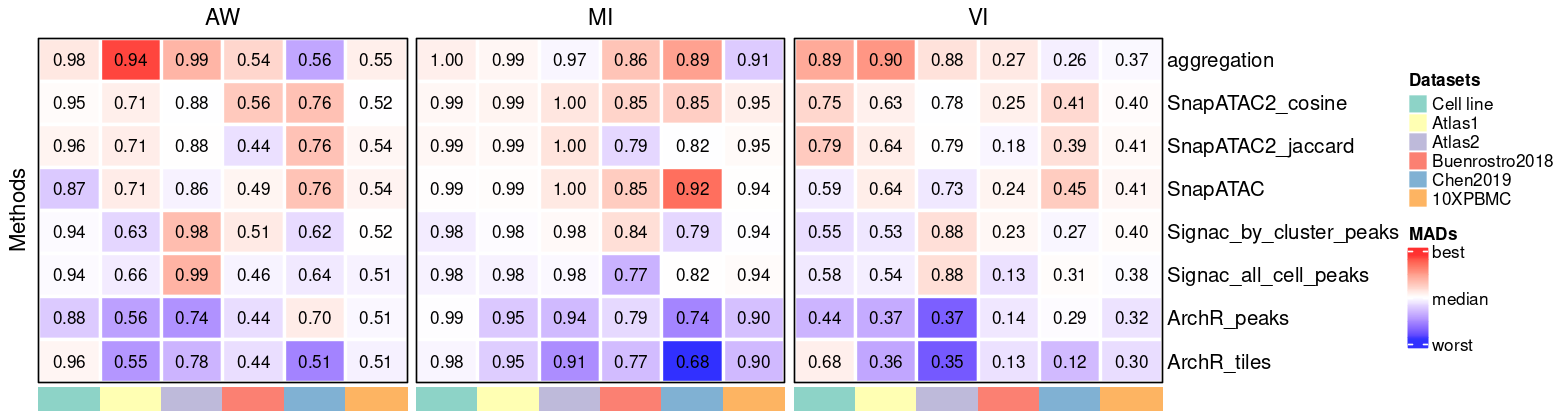

In [48]:
ht_list2 = hm_aw + hm_mi + hm_vi #+ hm_ami

draw(ht_list2, row_title = "Methods",
    column_title_gp = gpar(fontsize = 16), 
    annotation_legend_list= ComplexHeatmap::Legend(col_fun=col_fun, title = "MADs", at=c(-maxv, 0, maxv), labels=c("worst","median","best")))

In [253]:
ht_list = hm_ari + hm_ari2 + hm_av
# ht_list = hm_aw + hm_mi + hm_vi

pdf(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3b1.pdf"), width=13, height=3)
draw(ht_list, row_title = "Methods",
    column_title_gp = gpar(fontsize = 16), 
    annotation_legend_list= ComplexHeatmap::Legend(col_fun=col_fun, title = "MADs", at=c(-maxv, 0, maxv), labels=c("worst","median","best")))
dev.off() 

png 
  2

In [254]:
ht_list = hm_aw + hm_mi + hm_vi

pdf(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3b2.pdf"), width=13, height=3)
draw(ht_list, row_title = "Methods",
    column_title_gp = gpar(fontsize = 16), 
    annotation_legend_list= ComplexHeatmap::Legend(col_fun=col_fun, title = "MADs", at=c(-maxv, 0, maxv), labels=c("worst","median","best")))
dev.off() 

png 
  2

# Fig S6

In [57]:
df_auc_tmp <- df_auc %>% filter(long_method %in% c("ArchR_tiles", "ArchR_peaks","Signac_all_cell_peaks", "Signac_by_cluster_peaks", "SnapATAC2_cosine", "SnapATAC2_jaccard"))
df_auc_tmp <- df_auc_tmp %>% filter(metric !="AMI")

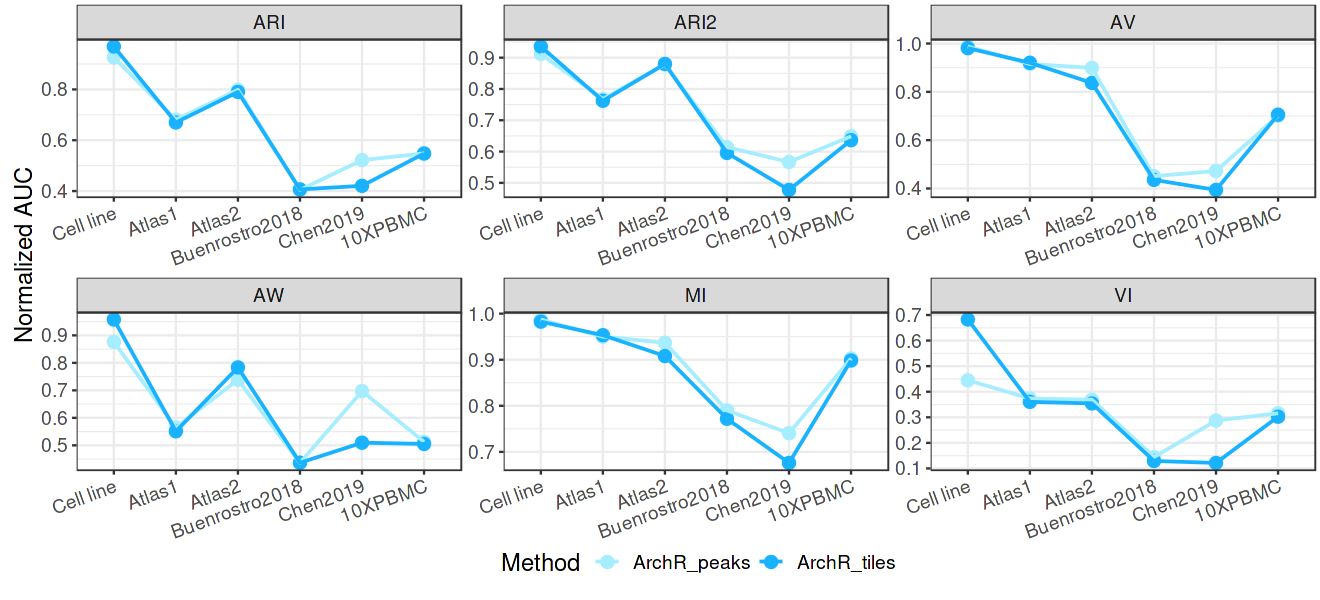

In [58]:
# options(repr.plot.width=11, repr.plot.height=5)

# p1 <-
# df_auc_tmp %>% filter(long_method %in% c("ArchR_tiles", "ArchR_peaks")) %>%
#   ggplot(aes(x=dataset, y=auc_frac, color=long_method)) + 
#   geom_point(size=3) +
#   geom_line(size=0.8, aes(x=dataset, y=auc_frac, group=long_method)) + 
#   facet_wrap(~metric, scales = "free", nrow = 2, ncol = 3) + 
#   xlab("") +
#   ylab("Normalized AUC") +
#   labs(color="Method") +
#   theme_bw() +
#   theme(text = element_text(size = 14),
#   legend.position = "bottom", 
#   legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
#   plot.margin = unit(c(0.1,0.1,0.5,0.3), "cm"),
#   axis.text.x = element_text(angle = 20, hjust=1)) +
#   scale_colour_manual(values = my_col_method[c(3,4)]) 
# p1

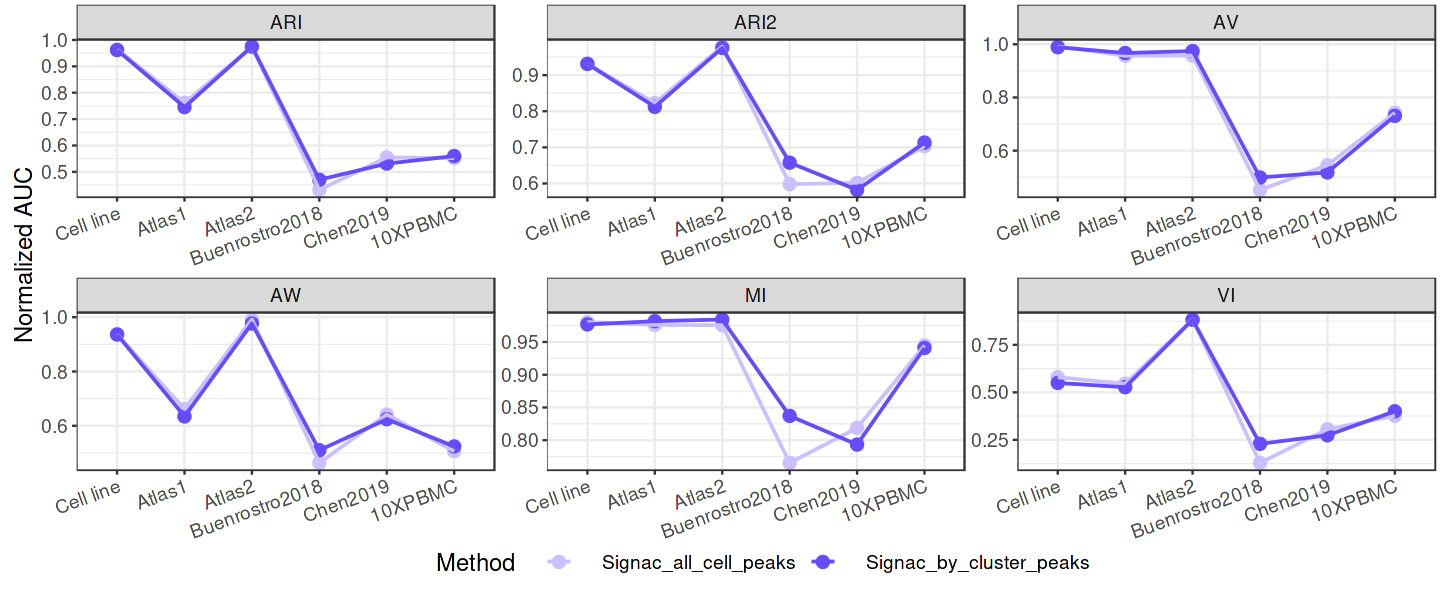

In [59]:
# options(repr.plot.width=12, repr.plot.height=5)

# p2 <-
# df_auc_tmp %>% filter(long_method %in% c("Signac_all_cell_peaks", "Signac_by_cluster_peaks")) %>%
#   ggplot(aes(x=dataset, y=	auc_frac, color=long_method)) + 
#   geom_point(size=3) +
#   geom_line(size=0.8, aes(x=dataset, y=auc_frac, group=long_method)) + 
#   facet_wrap(~metric, scales = "free", nrow = 2, ncol = 3) + 
#   xlab("") +
#   ylab("Normalized AUC") +
#   labs(color="Method") +
#   theme_bw() +
#   theme(text = element_text(size = 14),
#         legend.position = "bottom",
#         legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
#         plot.margin = unit(c(0.1,0.1,0.5,0.3), "cm"), 
#         axis.text.x = element_text(angle = 20, hjust=1),
#         legend.spacing.x = unit(0.6, 'cm')) +
#   scale_colour_manual(values = my_col_method[c(5,6)]) 
# p2

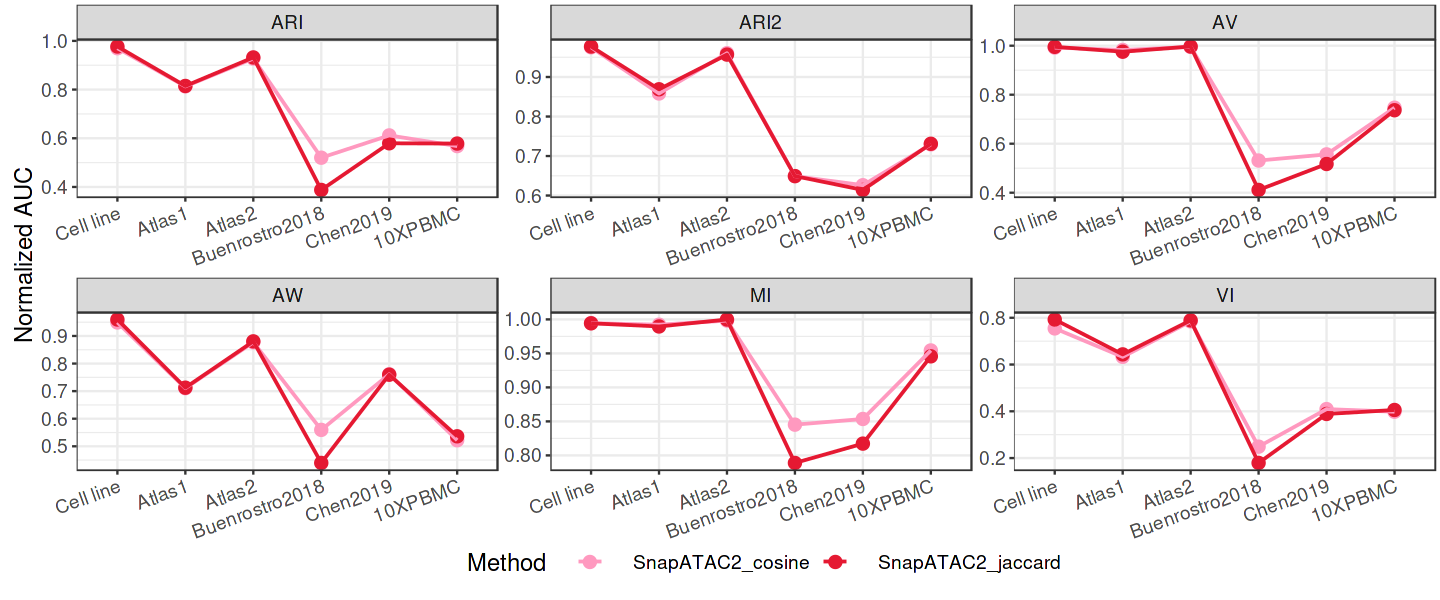

In [60]:
# options(repr.plot.width=12, repr.plot.height=5)

# p3 <-
# df_auc_tmp %>% filter(long_method %in% c("SnapATAC2_cosine", "SnapATAC2_jaccard")) %>%
#   ggplot(aes(x=dataset, y=	auc_frac, color=long_method)) + 
#   geom_point(size=3) +
#   geom_line(size=0.8, aes(x=dataset, y=auc_frac, group=long_method)) + 
#   facet_wrap(~metric, scales = "free", nrow = 2, ncol = 3) + 
#   xlab("") +
#   ylab("Normalized AUC") +
#   labs(color="Method") +
#   theme_bw() +
#   theme(text = element_text(size = 14),
#         legend.position = "bottom", 
#         legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
#         legend.spacing.x = unit(0.6, 'cm'),
#         plot.margin = unit(c(0.1,0.1,0.5,0.3), "cm"),
#         axis.text.x = element_text(angle = 20, hjust=1)) +
#   scale_colour_manual(values = my_col_method[c(7,8)])
# p3

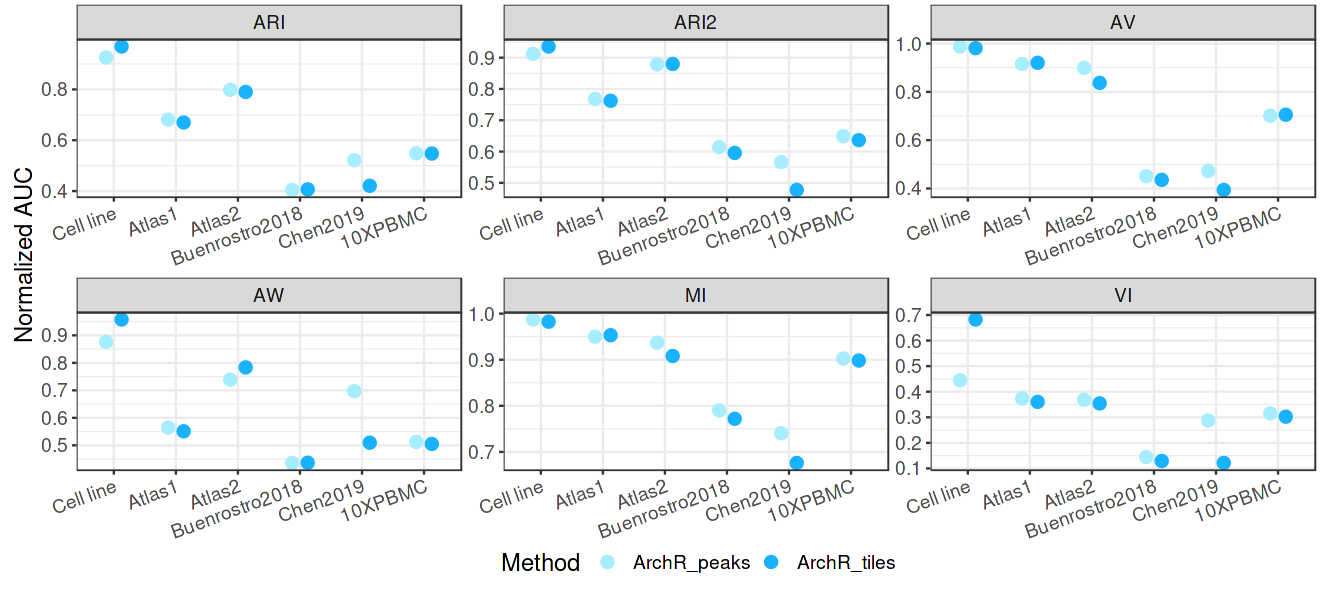

In [68]:
options(repr.plot.width=11, repr.plot.height=5)

p1 <-
df_auc_tmp %>% filter(long_method %in% c("ArchR_tiles", "ArchR_peaks")) %>%
  ggplot(aes(x=dataset, y=auc_frac, color=long_method)) + 
  geom_point(size=3, position=position_dodge(width=0.5)) +
  # geom_line(size=0.8, aes(x=dataset, y=auc_frac, group=long_method)) + 
  facet_wrap(~metric, scales = "free", nrow = 2, ncol = 3) + 
  xlab("") +
  ylab("Normalized AUC") +
  labs(color="Method") +
  theme_bw() +
  theme(text = element_text(size = 14),
  legend.position = "bottom", 
  legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
  plot.margin = unit(c(0.1,0.1,0.5,0.3), "cm"),
  axis.text.x = element_text(angle = 20, hjust=1)) +
  scale_colour_manual(values = my_col_method[c(3,4)]) 
p1

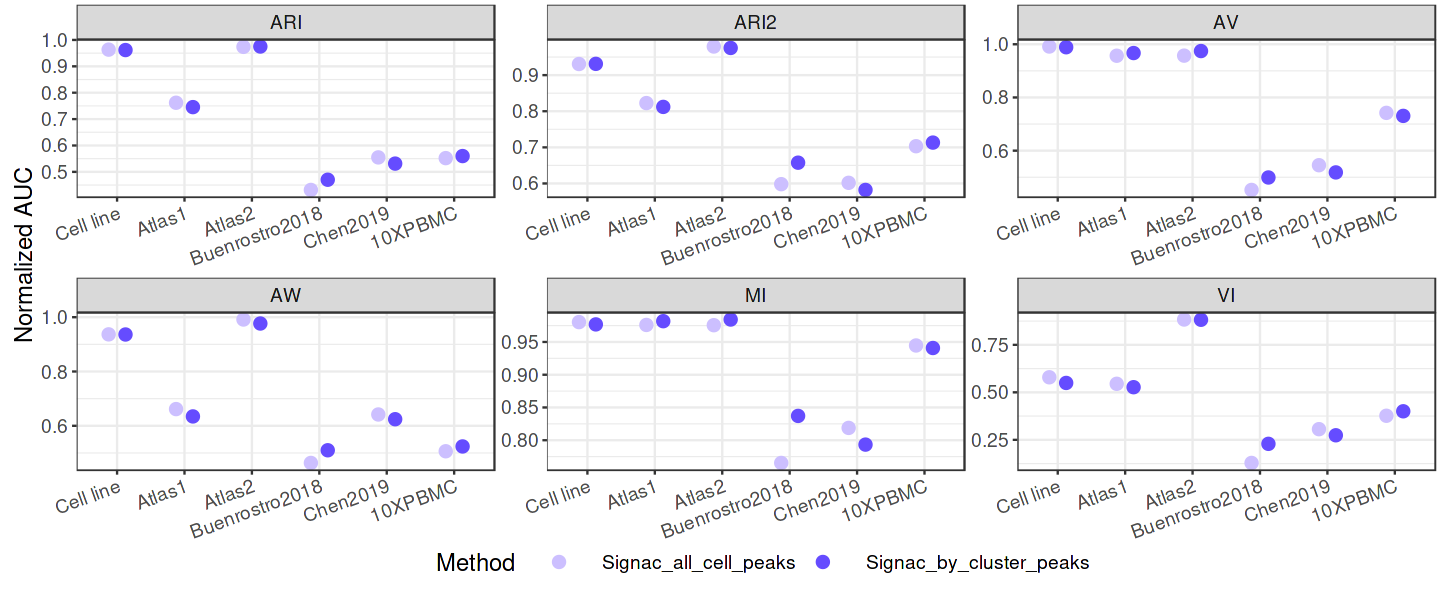

In [69]:
options(repr.plot.width=12, repr.plot.height=5)

p2 <-
df_auc_tmp %>% filter(long_method %in% c("Signac_all_cell_peaks", "Signac_by_cluster_peaks")) %>%
  ggplot(aes(x=dataset, y=	auc_frac, color=long_method)) + 
  geom_point(size=3, position=position_dodge(width=0.5)) +
  # geom_line(size=0.8, aes(x=dataset, y=auc_frac, group=long_method)) + 
  facet_wrap(~metric, scales = "free", nrow = 2, ncol = 3) + 
  xlab("") +
  ylab("Normalized AUC") +
  labs(color="Method") +
  theme_bw() +
  theme(text = element_text(size = 14),
        legend.position = "bottom",
        legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
        plot.margin = unit(c(0.1,0.1,0.5,0.3), "cm"), 
        axis.text.x = element_text(angle = 20, hjust=1),
        legend.spacing.x = unit(0.6, 'cm')) +
  scale_colour_manual(values = my_col_method[c(5,6)]) 
p2

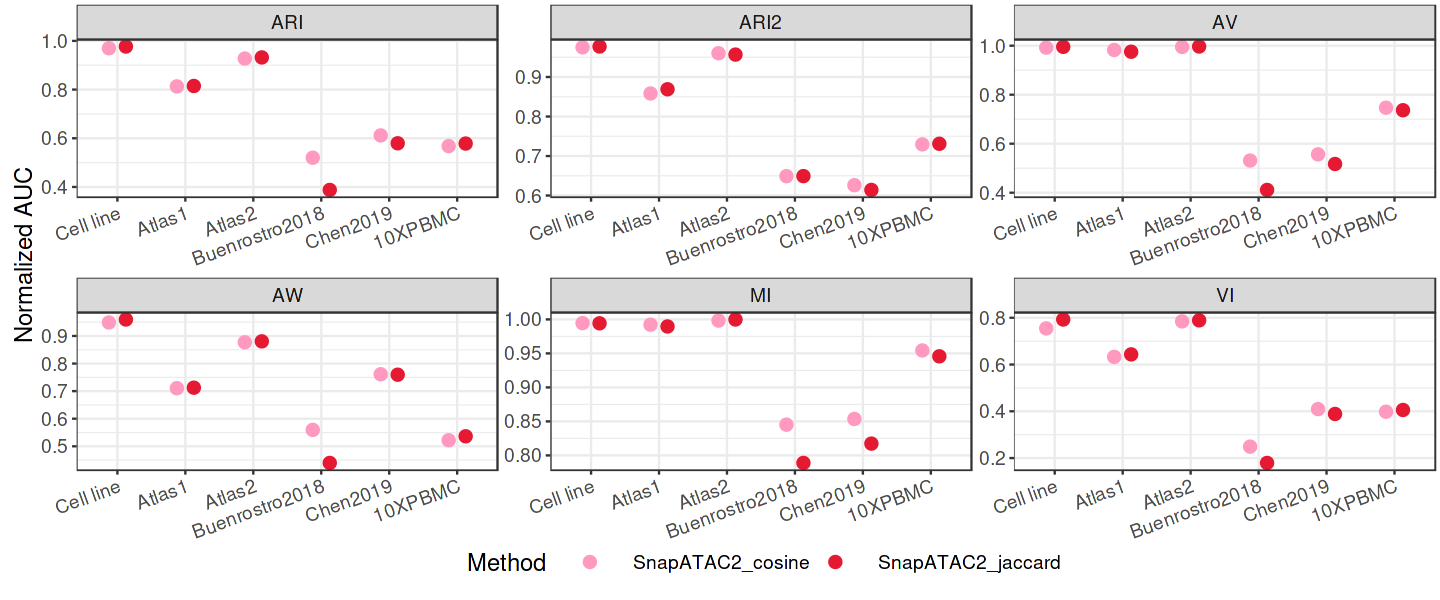

In [70]:
options(repr.plot.width=12, repr.plot.height=5)

p3 <-
df_auc_tmp %>% filter(long_method %in% c("SnapATAC2_cosine", "SnapATAC2_jaccard")) %>%
  ggplot(aes(x=dataset, y=	auc_frac, color=long_method)) + 
  geom_point(size=3, position=position_dodge(width=0.5)) +
  # geom_line(size=0.8, aes(x=dataset, y=auc_frac, group=long_method)) + 
  facet_wrap(~metric, scales = "free", nrow = 2, ncol = 3) + 
  xlab("") +
  ylab("Normalized AUC") +
  labs(color="Method") +
  theme_bw() +
  theme(text = element_text(size = 14),
        legend.position = "bottom", 
        legend.margin = margin(t = -25, r = 0, b = 0, l = 0, unit = "pt"),
        legend.spacing.x = unit(0.6, 'cm'),
        plot.margin = unit(c(0.1,0.1,0.5,0.3), "cm"),
        axis.text.x = element_text(angle = 20, hjust=1)) +
  scale_colour_manual(values = my_col_method[c(7,8)])
p3

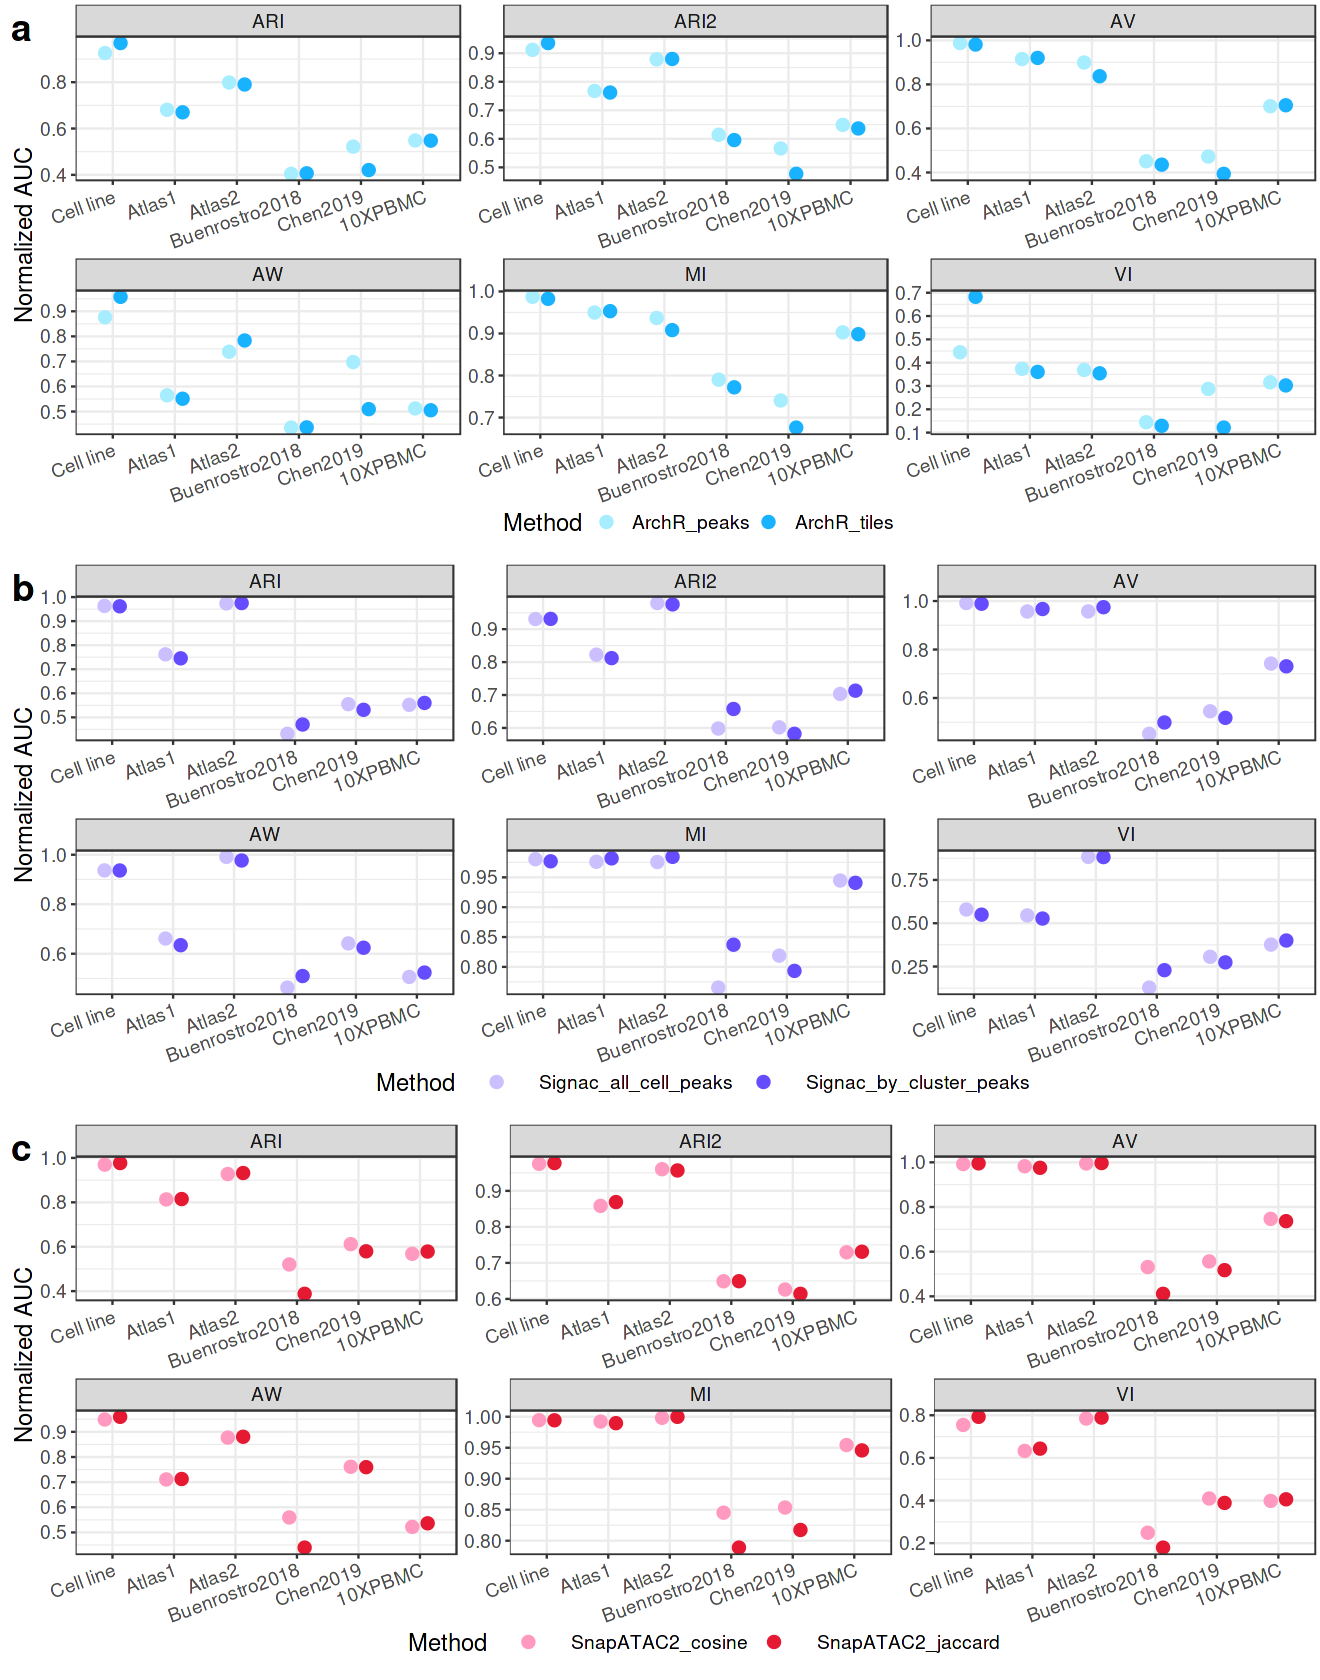

In [71]:
library(ggpubr)
options(repr.plot.width=11, repr.plot.height=14)
p4 <- ggarrange(p1, p2, p3, 
          labels = c("a", "b", "c"),font.label=list(color="black",size=22, face="bold"),
          ncol = 1, nrow = 3)
p4

In [72]:
pdf(paste0("../figures/FigS6.pdf"), width=11, height=14)
print(p4)
dev.off() 

png 
  2

# Fig S7

In [23]:
df_metrics_selected <- df_metrics %>% filter(metric %in% c("Silhouette_label", 'cLISI_label', 'avg_connectivity_knn', 'avg_connectivity_snn', 'avg_connectivity_umap'))
mapping <- list("Silhouette_label" = "ASW", 
                     "cLISI_label" = "cLISI", 
                     'avg_connectivity_knn' = "PWC_KNN",
                     'avg_connectivity_snn' = "PWC",
                     'avg_connectivity_umap' = "PWC_UMAP")

df_metrics_selected <- df_metrics_selected %>% 
  mutate(metric2= case_when(as.character(metric) %in% names(mapping) ~ mapping[as.character(metric)]))

df_metrics_selected$metric2 <- unlist(df_metrics_selected$metric2)

In [24]:
head(df_metrics_selected)

n_clusters metric                value       method long_method            
1 0          Silhouette_label      0.315582950 Signac Signac_by_cluster_peaks
2 0          cLISI_label           1.014761136 Signac Signac_by_cluster_peaks
3 0          avg_connectivity_knn  0.003147397 Signac Signac_by_cluster_peaks
4 0          avg_connectivity_snn  0.007849514 Signac Signac_by_cluster_peaks
5 0          avg_connectivity_umap 0.005079811 Signac Signac_by_cluster_peaks
6 0          Silhouette_label      0.310063132 Signac Signac_all_cell_peaks  
  feature_type     tile_size distance ndim resolution
1 by_cluster_peaks 0         default  15   NA        
2 by_cluster_peaks 0         default  15   NA        
3 by_cluster_peaks 0         default  15   NA        
4 by_cluster_peaks 0         default  15   NA        
5 by_cluster_peaks 0         default  15   NA        
6 all_cell_peaks   0         default  15   NA        
  rds_file                                                                                    
1 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/latent_space_evaluation.RDS
2 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/latent_space_evaluation.RDS
3 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/latent_space_evaluation.RDS
4 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/latent_space_evaluation.RDS
5 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/latent_space_evaluation.RDS
6 Cell_line_mixing/evaluation/Signac/all_cell_peaks/0/default/15/latent_space_evaluation.RDS  
  clustering_file
1 NA             
2 NA             
3 NA             
4 NA             
5 NA             
6 NA             
  snn_file                                                                     
1 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
2 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
3 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
4 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
5 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
6 Cell_line_mixing/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS  
  seed dataset   k_optimal dataset2         metric2 
1 NA   Cell line 10        Cell_line_mixing ASW     
2 NA   Cell line 10        Cell_line_mixing cLISI   
3 NA   Cell line 10        Cell_line_mixing PWC_KNN 
4 NA   Cell line 10        Cell_line_mixing PWC     
5 NA   Cell line 10        Cell_line_mixing PWC_UMAP
6 NA   Cell line 10        Cell_line_mixing ASW

In [32]:
unique(df_metrics_selected$metric)

[1] "Silhouette_label"      "cLISI_label"           "avg_connectivity_knn" 
[4] "avg_connectivity_snn"  "avg_connectivity_umap"

[1] "Signac"      "ArchR"       "SnapATAC"    "aggregation" "SnapATAC2"

In [26]:
df_hm <- read.table("../result_files/Negative_silhouette_frac_avg_ndim_all.tsv", sep="\t", header = TRUE)
df_hm$metric <- "FNS"
df_hm$metric2 <- "FNS"
colnames(df_hm)[colnames(df_hm)=="average"] <- "value"
df_hm <- subset(df_hm, select=c("long_method", "dataset_short", "ndim", "metric", "metric2", "value"))
head(df_hm)

long_method             dataset_short ndim metric metric2 value      
1 Signac_by_cluster_peaks Cell line     15   FNS    FNS     0.025694690
2 Signac_all_cell_peaks   Cell line     15   FNS    FNS     0.021946829
3 ArchR_tiles             Cell line     15   FNS    FNS     0.042045451
4 ArchR_peaks             Cell line     15   FNS    FNS     0.049399456
5 SnapATAC1               Cell line     15   FNS    FNS     0.010093875
6 aggregation             Cell line     15   FNS    FNS     0.002173432

In [29]:
colnames(df_hm) <- c('long_method','dataset','ndim','metric','metric2','value')

In [50]:
df_pwc <- read.table("../result_files/pwc_value.tsv", sep="\t", header = TRUE)
df_pwc$metric <- "PWC"
df_pwc$metric2 <- "PWC"
df_pwc <- df_pwc %>% select('long_method','dataset','ndim','metric','metric2','value')
head(df_pwc)

long_method      dataset   ndim metric metric2 value      
1 aggregation      Cell line  15  PWC    PWC     0.001549463
2 aggregation      Cell line  30  PWC    PWC     0.001504105
3 aggregation      Cell line  50  PWC    PWC     0.001480042
4 aggregation      Cell line 100  PWC    PWC     0.001068563
5 SnapATAC2_cosine Cell line  15  PWC    PWC     0.010244124
6 SnapATAC2_cosine Cell line  30  PWC    PWC     0.018441004

In [51]:
df_plot <- subset(df_metrics_selected, select=c("long_method", "dataset", "ndim", "metric", "metric2", "value"))
df_plot <- rbind(df_plot, df_hm, df_pwc)
df_plot$long_method <- as.character(df_plot$long_method)
df_plot$long_method[df_plot$long_method=="SnapATAC1"] <- "SnapATAC"
df_plot$long_method <- factor(df_plot$long_method, levels=c("aggregation", "SnapATAC", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

In [52]:
unique(df_plot$metric2)
unique(df_plot$long_method)

[1] "ASW"      "cLISI"    "PWC_KNN"  "PWC"      "PWC_UMAP" "FNS"

[1] Signac_by_cluster_peaks Signac_all_cell_peaks   ArchR_tiles            
[4] ArchR_peaks             SnapATAC                aggregation            
[7] SnapATAC2_jaccard       SnapATAC2_cosine       
8 Levels: aggregation SnapATAC ArchR_peaks ... SnapATAC2_jaccard

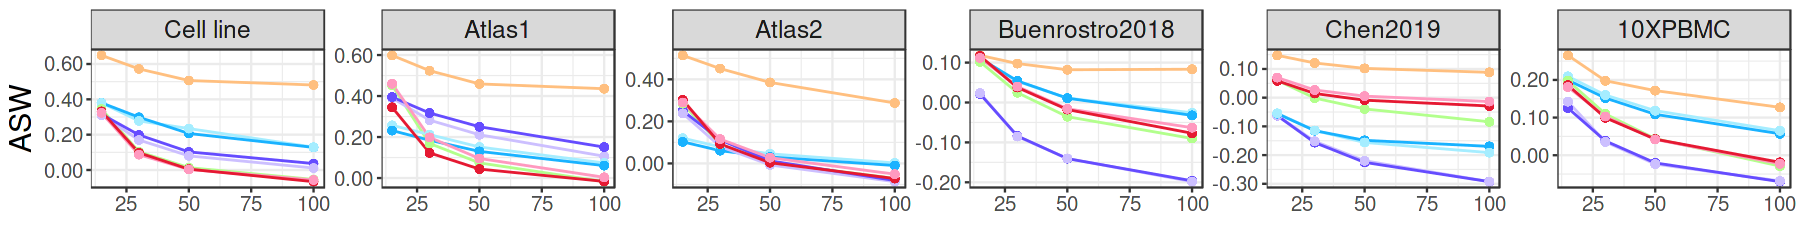

In [58]:
options(repr.plot.width=15, repr.plot.height=2)

p1 <- df_plot %>% 
        filter(metric2=="ASW") %>%
        ggplot(aes(x = ndim, y = value, color = long_method)) +
        geom_line(size=0.6) + 
        geom_point(size=1.5) +
        facet_wrap(~dataset, scales = "free", ncol=6) + 
        theme_bw() +
        scale_colour_manual(values = my_col_method) +
        labs(x="", y="ASW", fill="Method") +
        theme(text = element_text(size = 18), 
              axis.text = element_text(size = 12), legend.position = "none", plot.margin = unit(c(0.2,0.2,-0.2,0.2), "cm"))  + scale_y_continuous(labels = scales::number_format(accuracy = 0.01,
                                 decimal.mark = '.'))

p1

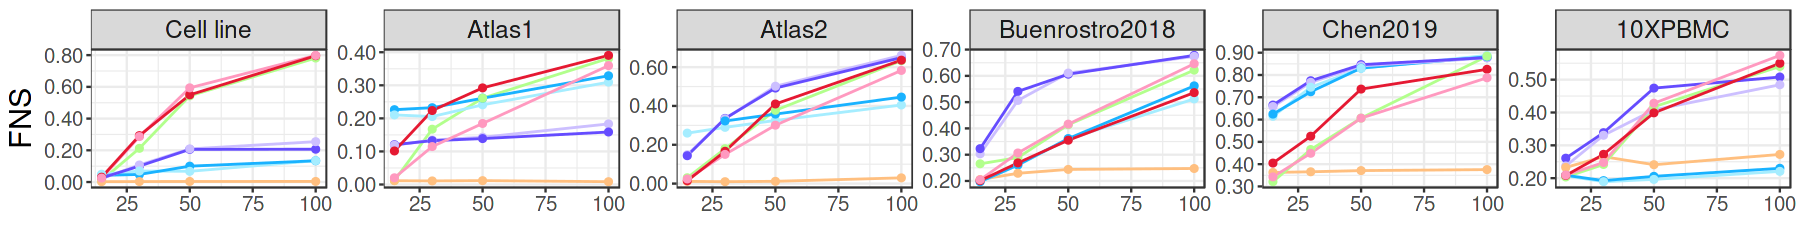

In [59]:
options(repr.plot.width=15, repr.plot.height=2)

p2 <- df_plot %>% 
        filter(metric2=="FNS") %>%
        ggplot(aes(x = ndim, y = value, color = long_method)) +
        geom_line(size=0.6) + 
        geom_point(size=1.5) +
        facet_wrap(~dataset, scales = "free", ncol=6) + 
        theme_bw() +
        scale_colour_manual(values = my_col_method) +
        labs(x="", y="FNS", fill="Method") +
        theme(text = element_text(size = 18), 
              axis.text = element_text(size = 12), legend.position = "none", plot.margin = unit(c(0.2,0.2,-0.2,0.2), "cm"))  + scale_y_continuous(labels = scales::number_format(accuracy = 0.01,
                                 decimal.mark = '.'))

p2

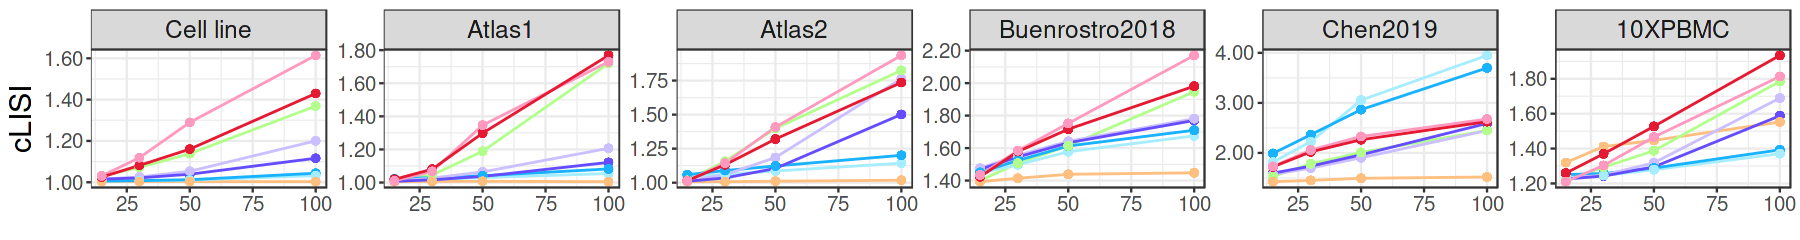

In [60]:
options(repr.plot.width=15, repr.plot.height=2)

p3 <- df_plot %>% 
        filter(metric2=="cLISI") %>%
        ggplot(aes(x = ndim, y = value, color = long_method)) +
        geom_line(size=0.6) + 
        geom_point(size=1.5) +
        facet_wrap(~dataset, scales = "free", ncol=6) + 
        theme_bw() +
        scale_colour_manual(values = my_col_method) +
        labs(x="", y="cLISI", fill="Method") +
        theme(text = element_text(size = 18), 
              axis.text = element_text(size = 12),
              legend.position = "none", 
              plot.margin = unit(c(0.2,0.2,-0.2,0.2), "cm")) + 
              scale_y_continuous(labels = scales::number_format(accuracy = 0.01,
                                 decimal.mark = '.'))  #+ coord_cartesian(ylim = c(1, 2))

p3

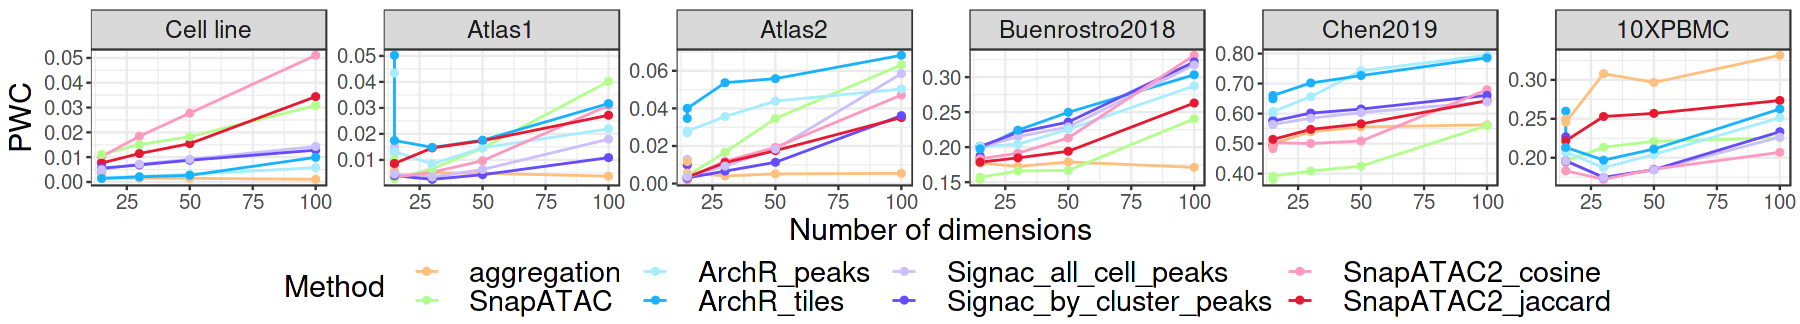

In [61]:
options(repr.plot.width=15, repr.plot.height=2.7)

p4 <- df_plot %>% 
        filter(metric2=="PWC") %>%
        ggplot(aes(x = ndim, y = value, color = long_method)) +
        geom_line(size=0.6) + 
        geom_point(size=1.5) +
        facet_wrap(~dataset, scales = "free", ncol=6) + 
        theme_bw() +
        scale_colour_manual(values = my_col_method) +
        labs(x="Number of dimensions", y="PWC", color="Method") +
        theme(text = element_text(size = 18), 
              axis.text = element_text(size = 12),
              legend.position = "bottom", 
              legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt"),
              plot.margin = unit(c(0.2,0.2,0.2,0.2), "cm"),
              legend.spacing.x = unit(0.6, 'cm'),
              legend.text=element_text(size=17))  + scale_y_continuous(labels = scales::number_format(accuracy = 0.01,
                                 decimal.mark = '.'))

p4

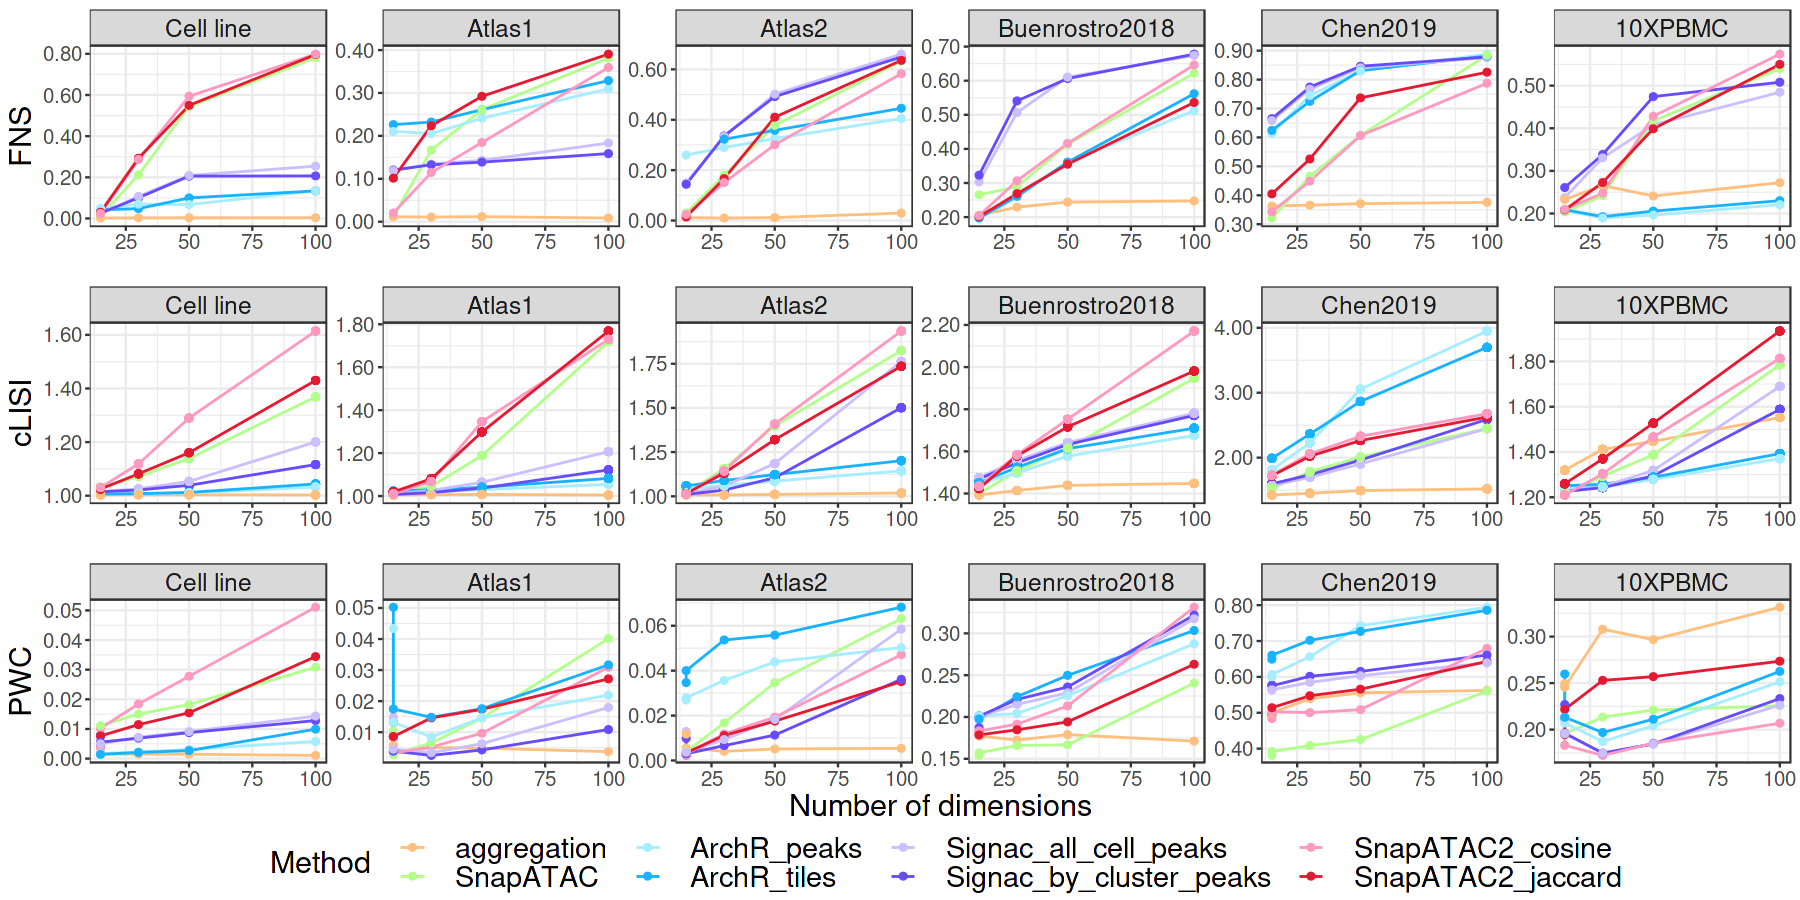

In [66]:
options(repr.plot.width=15, repr.plot.height=7.5)
p6 <- ggarrange(p2, p3, p4, nrow = 3, ncol = 1, heights = c(2,2,2.5)) 
p6

In [68]:
pdf("../figures/across_ndim_metrics_new.pdf", width=15, height=7.5)
print(p6)
dev.off() 

png 
  2

# Fig S11

In [10]:
df_g <- df_metrics %>% filter(metric == "log_geary_c_knn")
df_long <- reshape2::melt(df_g, id.vars = c("long_method", "method","dataset"))

In [16]:
df_g$value <- -df_g$value

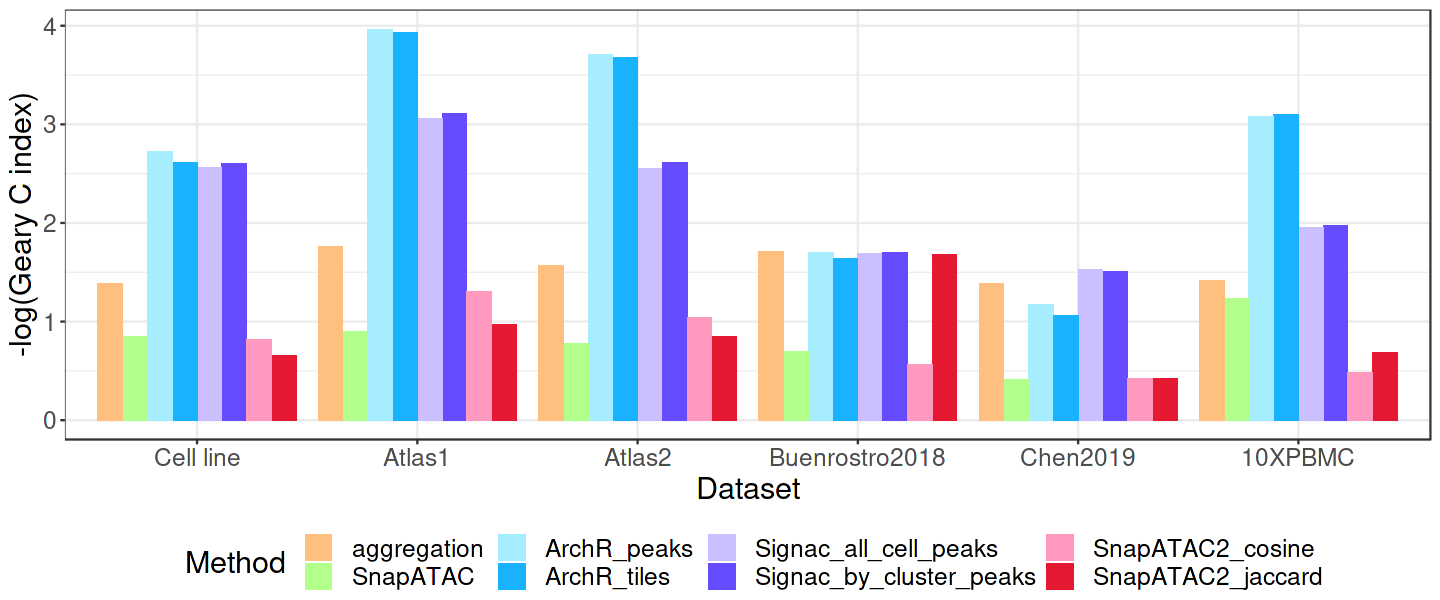

In [18]:
options(repr.plot.width=12, repr.plot.height=5)

  p <- df_g %>%
  ggplot(aes(x=dataset, y=value, fill=long_method)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Dataset", y = "-log(Geary C index)", fill = "Method") +
  scale_fill_manual(values = my_col_method) +
  theme_bw() +
  theme(text = element_text(size = 18), plot.margin = unit(c(0.2,0.2,0,0.2), "cm"),
   legend.position = "bottom", 
              # legend.justification = c(1.2,0), 
              # legend.margin = margin(t = -5, r = 0, b = 0, l = 0, unit = "pt"),
              legend.spacing.x = unit(0.4, 'cm'))

  print(p)


In [19]:
pdf("../figures/geary_c.pdf", width=12, height=5)
print(p)
dev.off() 

png 
  2